In [35]:
# %matplotlib inline
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

In [36]:
df_processed = pd.read_csv("data/indexProcessed.csv")
df_info = pd.read_csv("data/indexInfo.csv")
df_data = pd.read_csv("data/indexData.csv")

In [37]:
df_info.head()

Region                  Exchange      Index Currency
0  United States   New York Stock Exchange        NYA      USD
1  United States                    NASDAQ       IXIC      USD
2      Hong Kong  Hong Kong Stock Exchange        HSI      HKD
3          China   Shanghai Stock Exchange  000001.SS      CNY
4          Japan      Tokyo Stock Exchange       N225      JPY

In [38]:
df_processed.head()

Index        Date         Open         High          Low        Close  \
0   HSI  1986-12-31  2568.300049  2568.300049  2568.300049  2568.300049   
1   HSI  1987-01-02  2540.100098  2540.100098  2540.100098  2540.100098   
2   HSI  1987-01-05  2552.399902  2552.399902  2552.399902  2552.399902   
3   HSI  1987-01-06  2583.899902  2583.899902  2583.899902  2583.899902   
4   HSI  1987-01-07  2607.100098  2607.100098  2607.100098  2607.100098   

     Adj Close  Volume    CloseUSD  
0  2568.300049     0.0  333.879006  
1  2540.100098     0.0  330.213013  
2  2552.399902     0.0  331.811987  
3  2583.899902     0.0  335.906987  
4  2607.100098     0.0  338.923013

In [39]:
df_processed.describe()

Open           High            Low          Close  \
count  104224.000000  104224.000000  104224.000000  104224.000000   
mean     8015.353334    8063.324234    7962.581120    8014.366642   
std      9140.563404    9196.575802    9082.767802    9140.609758   
min        54.869999      54.869999      54.869999      54.869999   
25%      2046.887756    2057.213990    2037.185943    2047.506470   
50%      5772.140137    5812.764892    5725.199951    5773.710205   
75%     10487.377445   10552.179690   10416.092287   10488.622560   
max     68775.062500   69403.750000   68516.992190   68775.062500   

           Adj Close        Volume       CloseUSD  
count  104224.000000  1.042240e+05  104224.000000  
mean     8014.161269  1.347646e+09    3046.729177  
std      9140.720456  4.427662e+09    3747.865623  
min        54.869999  0.000000e+00      10.204900  
25%      2047.358490  0.000000e+00     320.460898  
50%      5773.710205  9.529000e+05    1371.598486  
75%     10488.622560  2.064676e+08    4383.045241  
max     68775.062500  9.440374e+10   18934.376173

In [40]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB


In [41]:
df_merge = df_processed.merge(df_info, how="inner", on="Index")
df_merge.head()

Index        Date         Open         High          Low        Close  \
0   HSI  1986-12-31  2568.300049  2568.300049  2568.300049  2568.300049   
1   HSI  1987-01-02  2540.100098  2540.100098  2540.100098  2540.100098   
2   HSI  1987-01-05  2552.399902  2552.399902  2552.399902  2552.399902   
3   HSI  1987-01-06  2583.899902  2583.899902  2583.899902  2583.899902   
4   HSI  1987-01-07  2607.100098  2607.100098  2607.100098  2607.100098   

     Adj Close  Volume    CloseUSD     Region                  Exchange  \
0  2568.300049     0.0  333.879006  Hong Kong  Hong Kong Stock Exchange   
1  2540.100098     0.0  330.213013  Hong Kong  Hong Kong Stock Exchange   
2  2552.399902     0.0  331.811987  Hong Kong  Hong Kong Stock Exchange   
3  2583.899902     0.0  335.906987  Hong Kong  Hong Kong Stock Exchange   
4  2607.100098     0.0  338.923013  Hong Kong  Hong Kong Stock Exchange   

  Currency  
0      HKD  
1      HKD  
2      HKD  
3      HKD  
4      HKD

In [42]:
df_merge["Date"] = pd.to_datetime(df_merge["Date"])
df_merge["Days since epoch"] = (df_merge["Date"] - pd.to_datetime("1970-01-01")).dt.days
df_merge["Change"] = df_merge["Close"] - df_merge["Open"]
df_merge["Month"] = df_merge["Date"].dt.month
df_merge["Year"] = df_merge["Date"].dt.year
df_merge["Day"] = df_merge["Date"].dt.day
df_merge.set_index("Date", inplace=True)
df_merge = df_merge.dropna()
df_merge.head()

Index         Open         High          Low        Close  \
Date                                                                   
1986-12-31   HSI  2568.300049  2568.300049  2568.300049  2568.300049   
1987-01-02   HSI  2540.100098  2540.100098  2540.100098  2540.100098   
1987-01-05   HSI  2552.399902  2552.399902  2552.399902  2552.399902   
1987-01-06   HSI  2583.899902  2583.899902  2583.899902  2583.899902   
1987-01-07   HSI  2607.100098  2607.100098  2607.100098  2607.100098   

              Adj Close  Volume    CloseUSD     Region  \
Date                                                     
1986-12-31  2568.300049     0.0  333.879006  Hong Kong   
1987-01-02  2540.100098     0.0  330.213013  Hong Kong   
1987-01-05  2552.399902     0.0  331.811987  Hong Kong   
1987-01-06  2583.899902     0.0  335.906987  Hong Kong   
1987-01-07  2607.100098     0.0  338.923013  Hong Kong   

                            Exchange Currency  Days since epoch  Change  \
Date                                                                      
1986-12-31  Hong Kong Stock Exchange      HKD              6208     0.0   
1987-01-02  Hong Kong Stock Exchange      HKD              6210     0.0   
1987-01-05  Hong Kong Stock Exchange      HKD              6213     0.0   
1987-01-06  Hong Kong Stock Exchange      HKD              6214     0.0   
1987-01-07  Hong Kong Stock Exchange      HKD              6215     0.0   

            Month  Year  Day  
Date                          
1986-12-31     12  1986   31  
1987-01-02      1  1987    2  
1987-01-05      1  1987    5  
1987-01-06      1  1987    6  
1987-01-07      1  1987    7

In [43]:
def edas():
    indexes = df_merge["Index"].unique()
#     indexes = ["NYA"]
    for index in indexes:
        df_index = df_merge.loc[df_merge["Index"]==index]
        df_index["SMA200"] = df_index["CloseUSD"].rolling(200).mean()  # 200 day simple moving average
        
        df_temp = df_index.copy()
        df_temp = df_temp.dropna()
                
        fig, ax = plt.subplots(5, figsize=(16, 28))
#         plt.subplots_adjust(top=1.6)
        
        ax[0].set_title("Close price in USD for the {} index".format(index))
        df_index["CloseUSD"].plot(ax=ax[0], label="CloseUSD", ylabel="Close price in USD")
        df_temp["SMA200"].plot(ax=ax[0], label="SMA200")
        ax[0].legend()
        
        ax[1].set_title("Open price for the {} index".format(index))
        df_index["Open"].plot(ax=ax[1], label="Open", ylabel="Open price")
#         ax[1].legend()
        
        ax[2].set_title("Close price for the {} index".format(index))
        df_index["Close"].plot(ax=ax[2], label="Close", ylabel="Close price")
#         ax[2].legend()
        
        ax[3].set_title("Volume for the {} index".format(index))
        df_index["Volume"].plot(ax=ax[3], label="Volume", ylabel="Volume")
#         ax[3].legend()
        
        ax[4].set_title("Daily change in close and open price for the {} index".format(index))
        df_index["Change"].plot(ax=ax[4], label="Change", ylabel="Change in price")
#         ax[4].legend()
        
        fig.tight_layout()
#         plt.savefig("eda_for_{}.png".format(index), facecolor='w', transparent=False)
        plt.show()

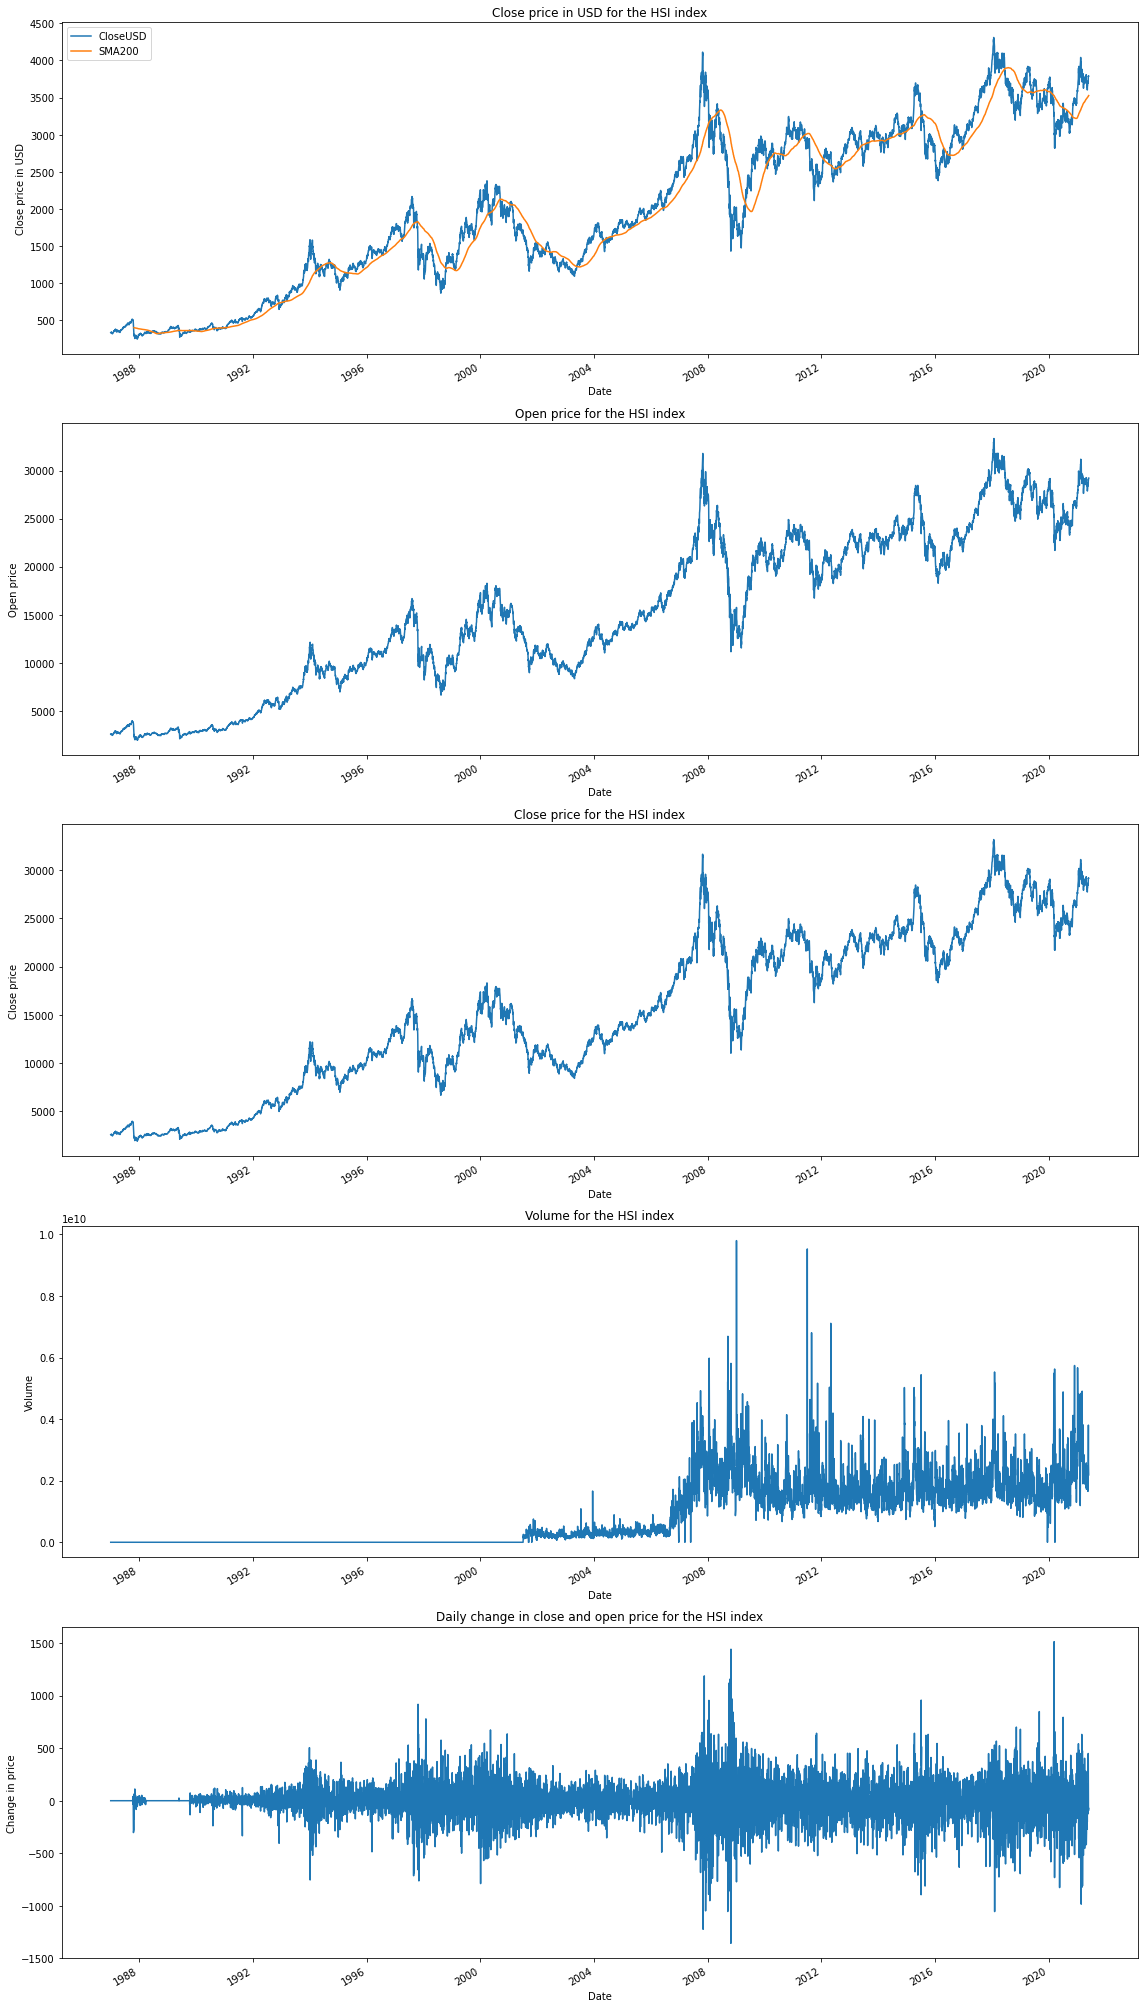

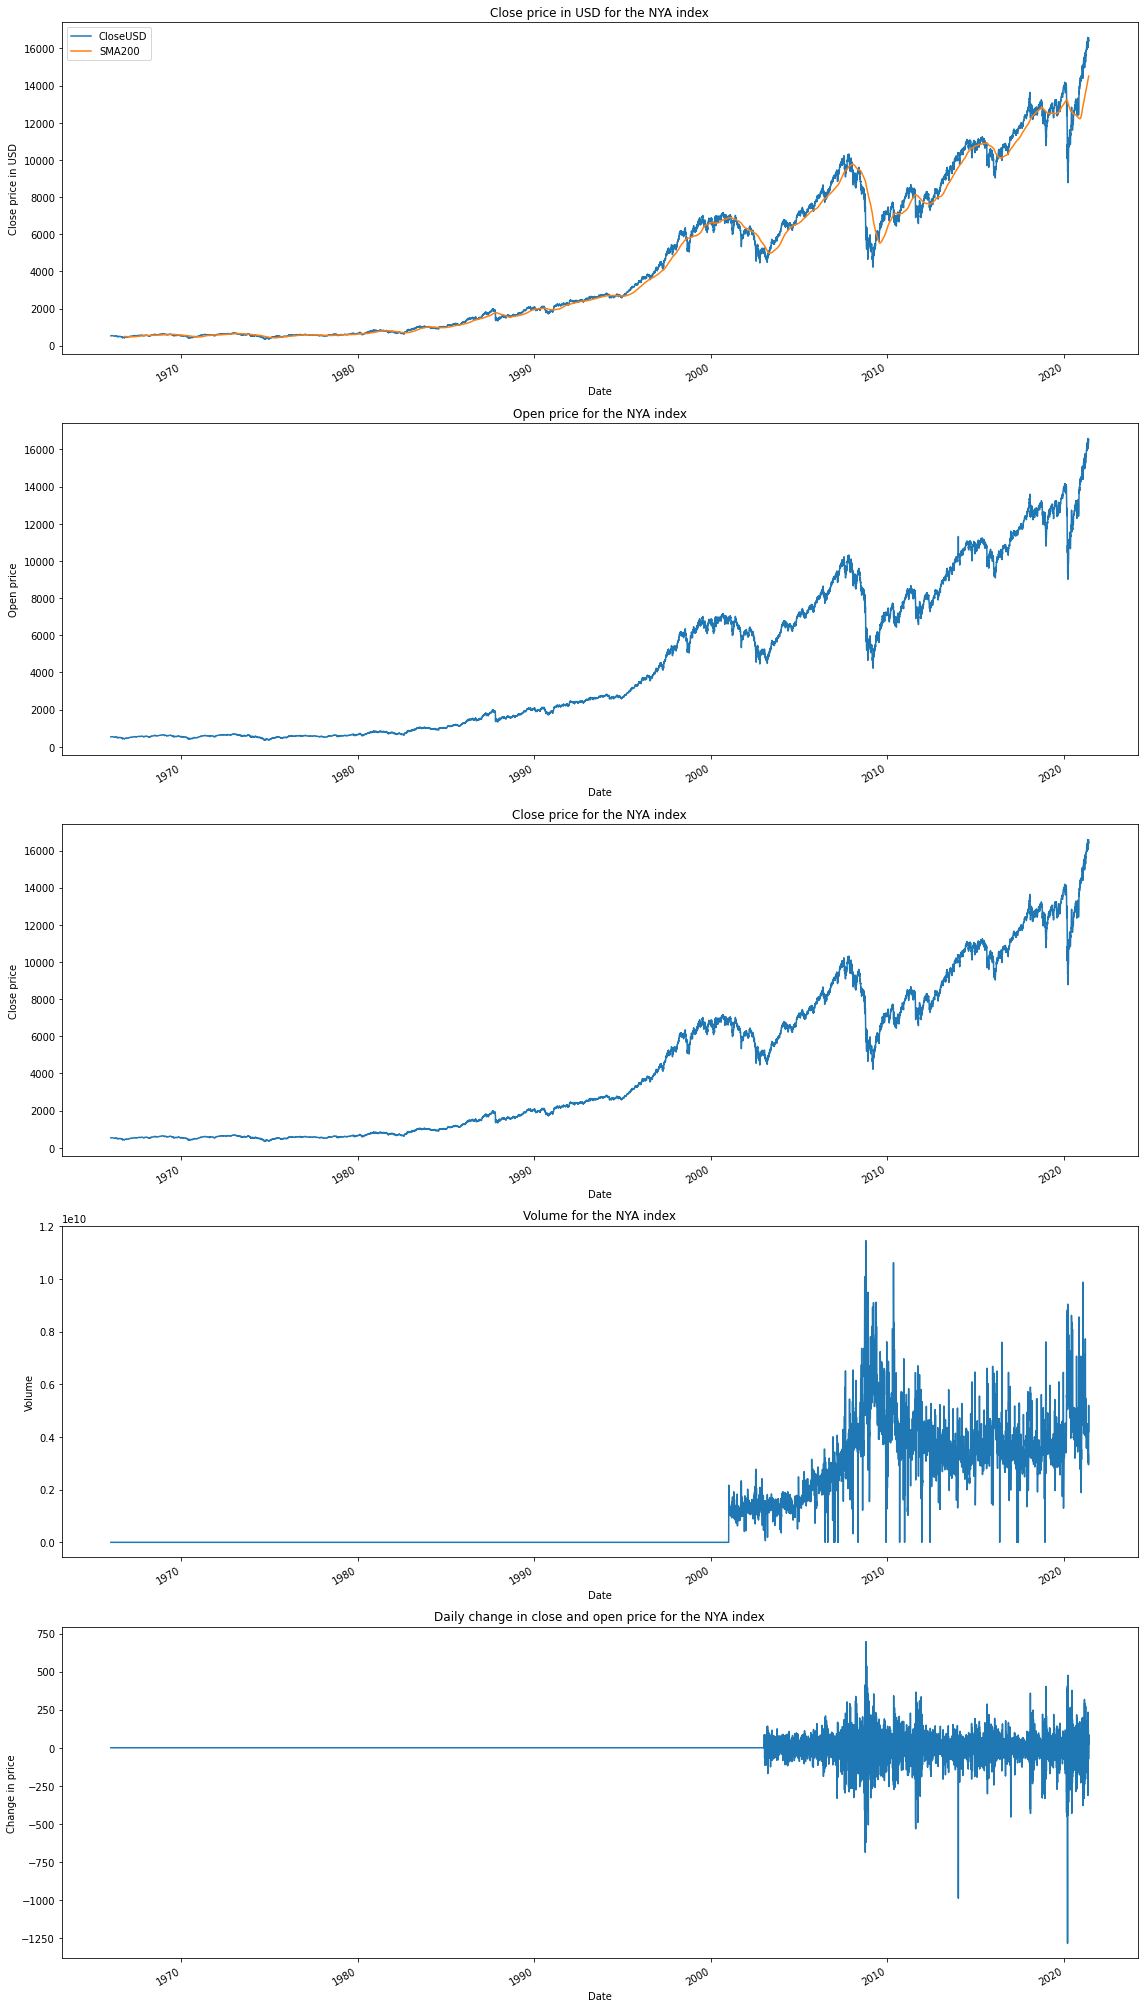

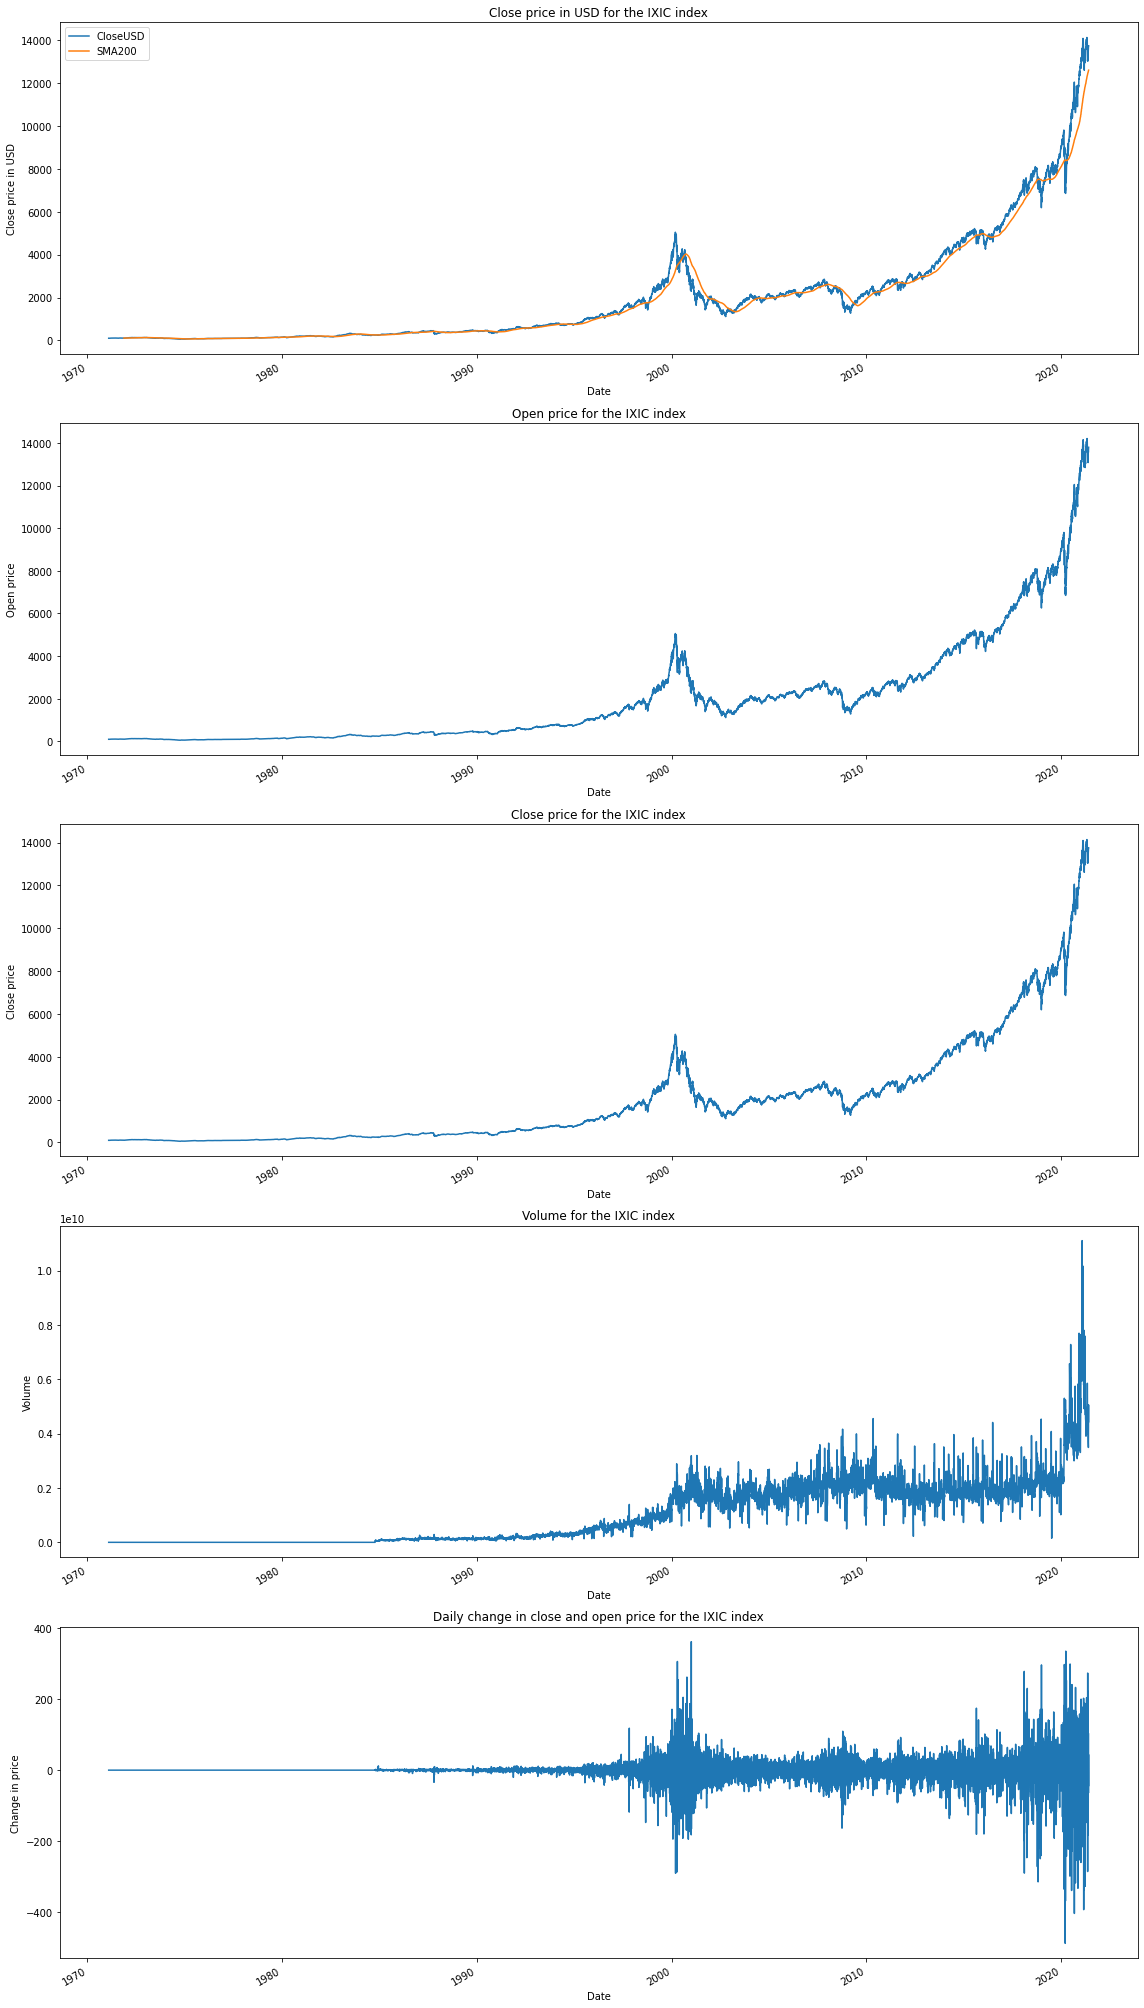

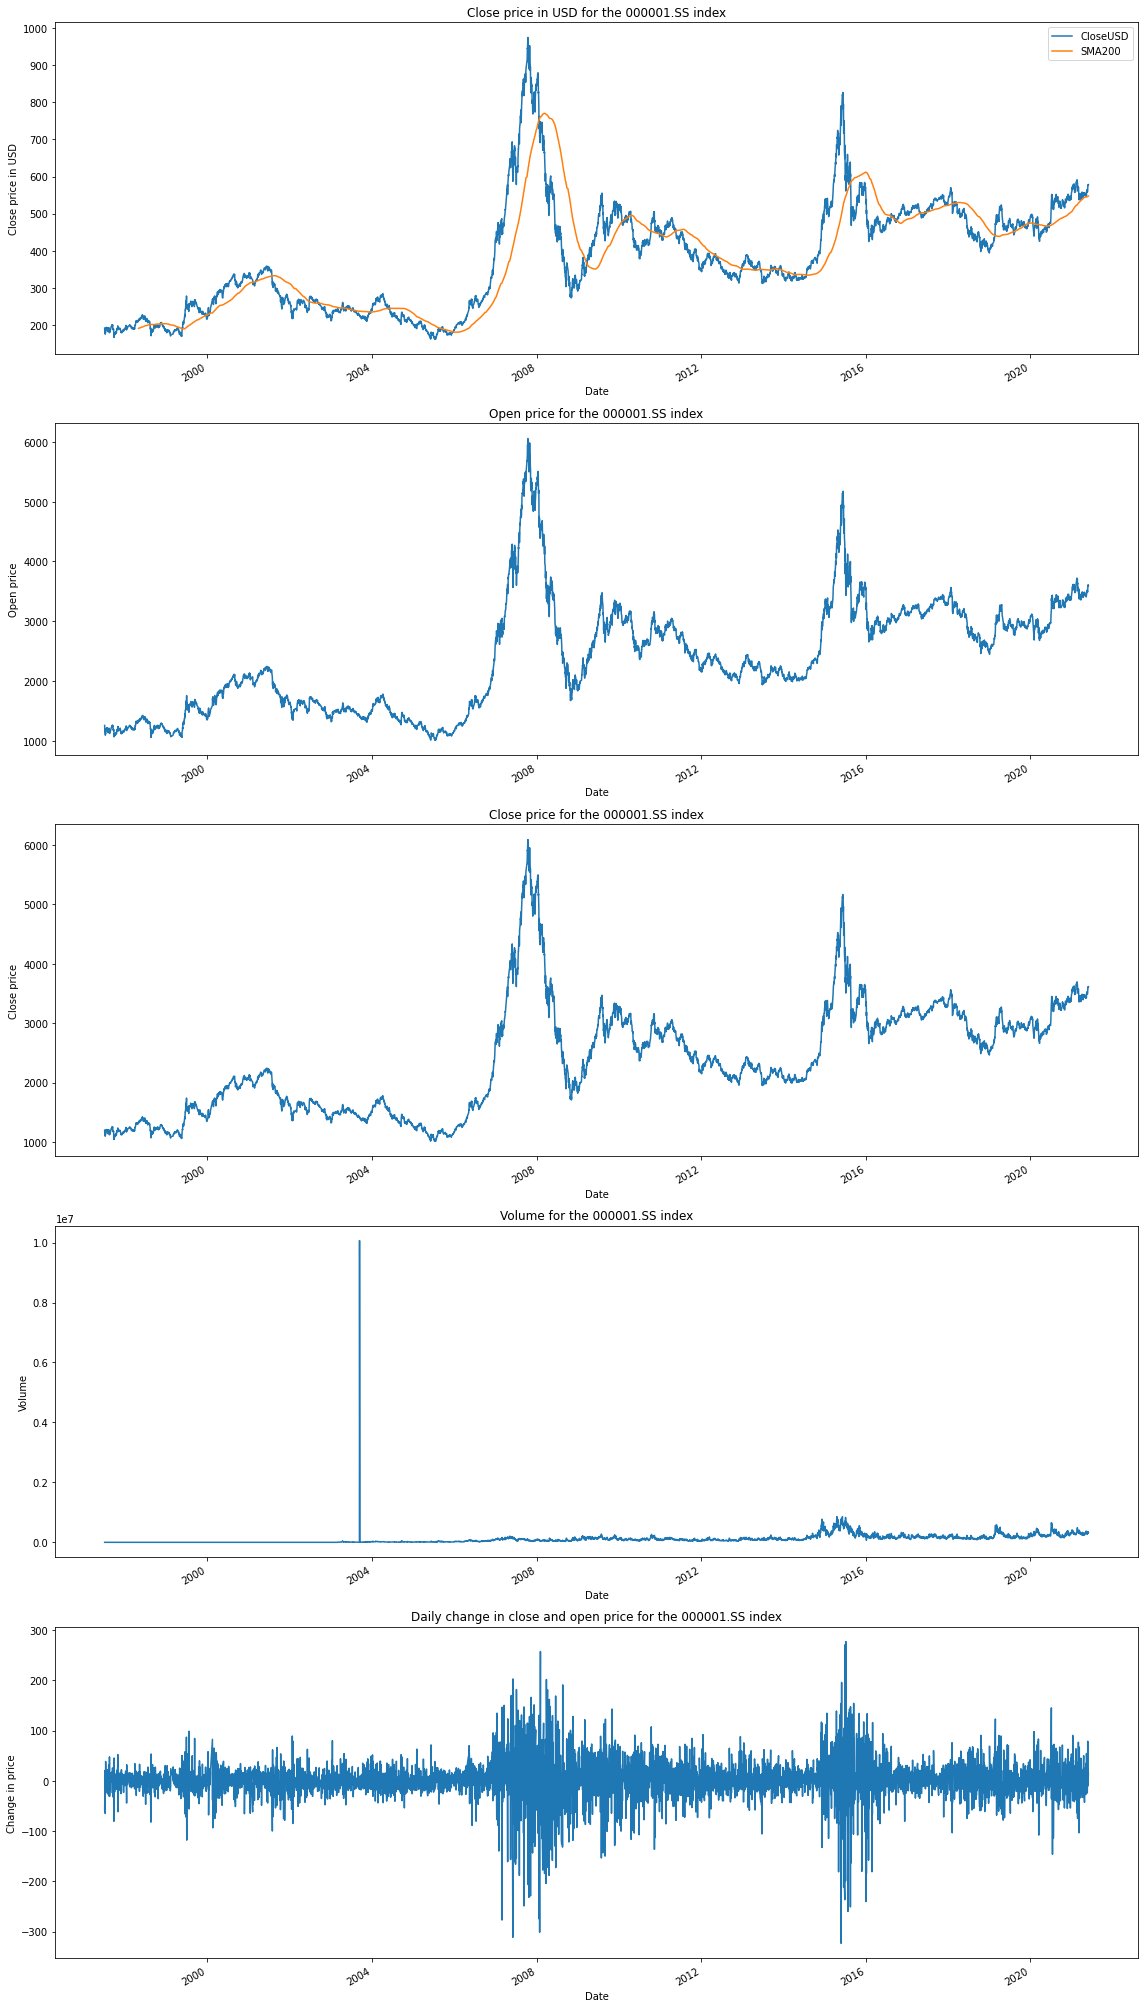

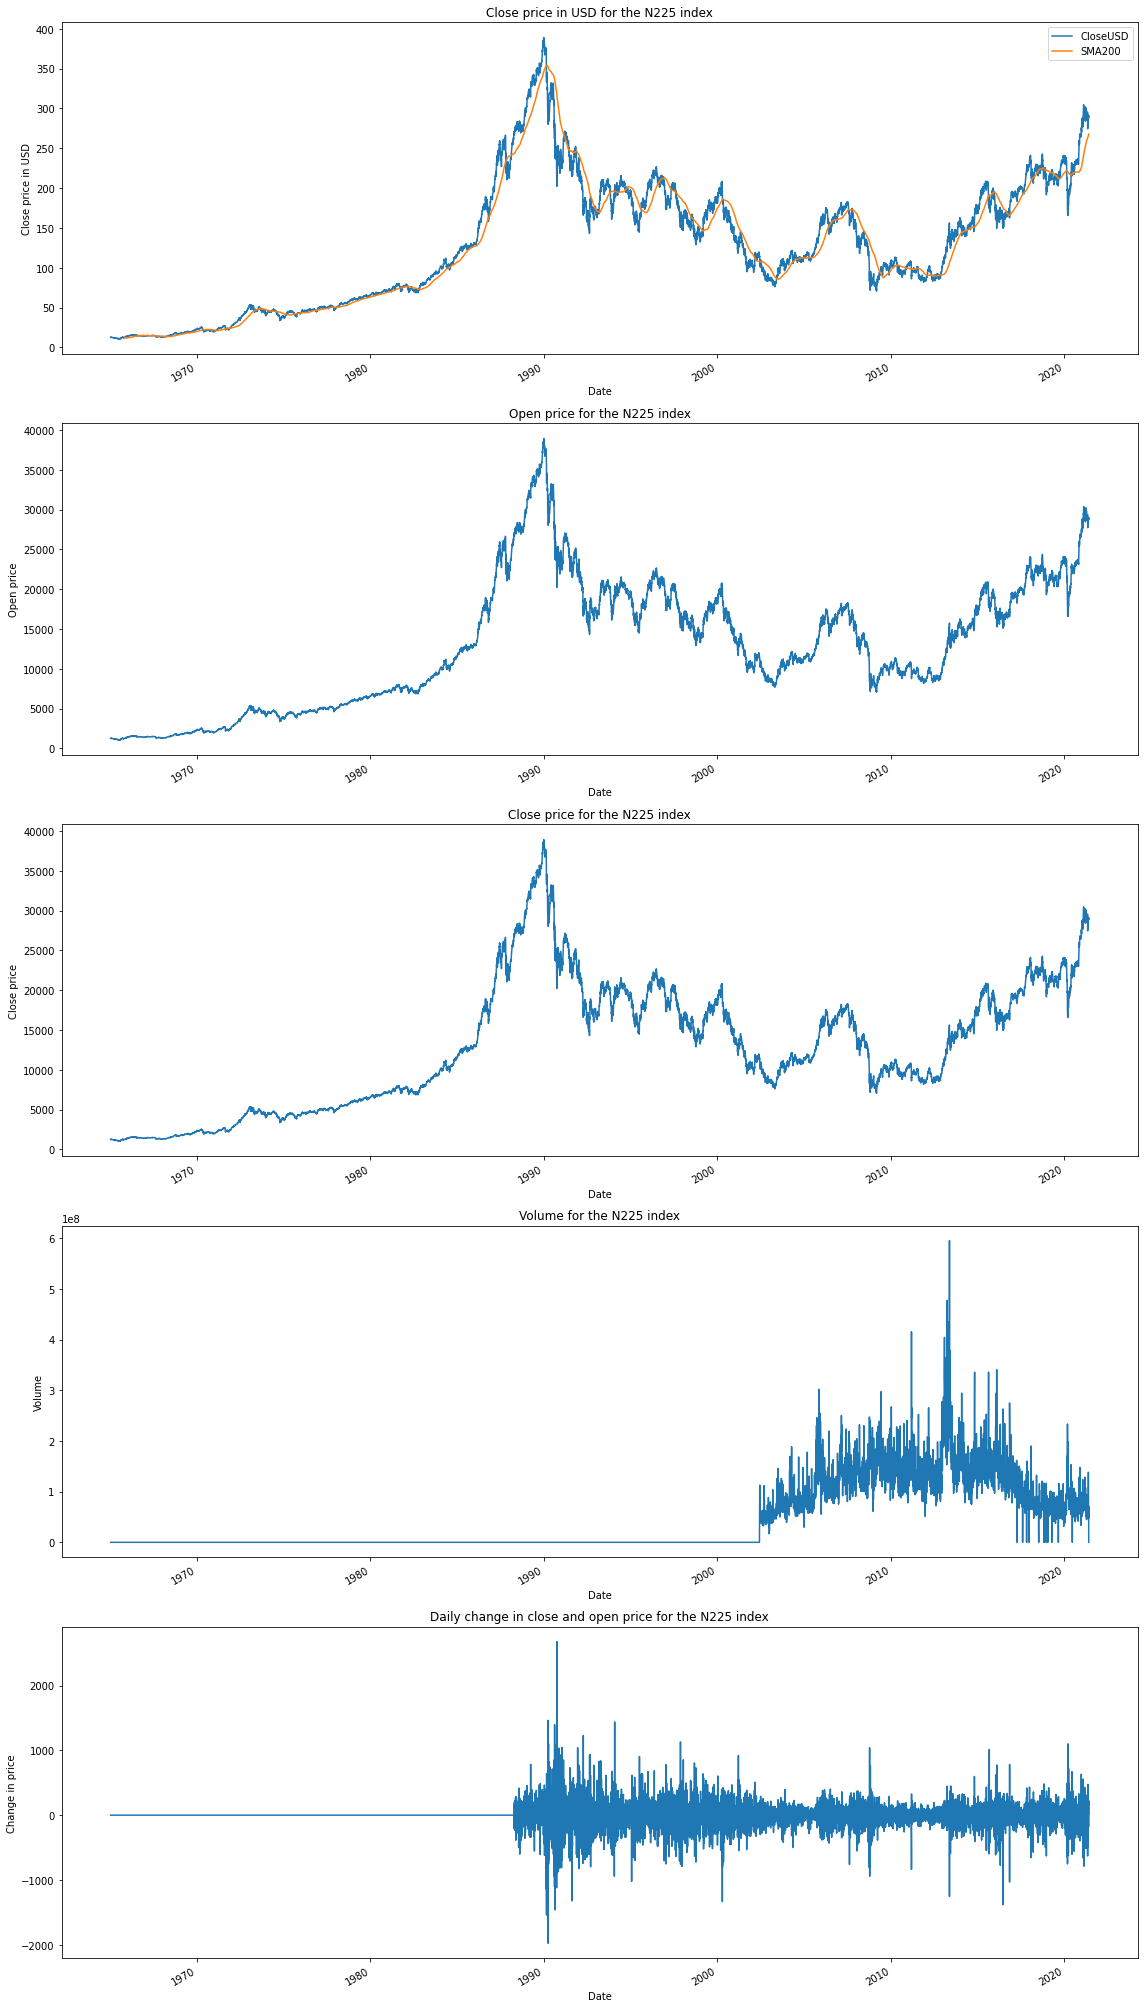

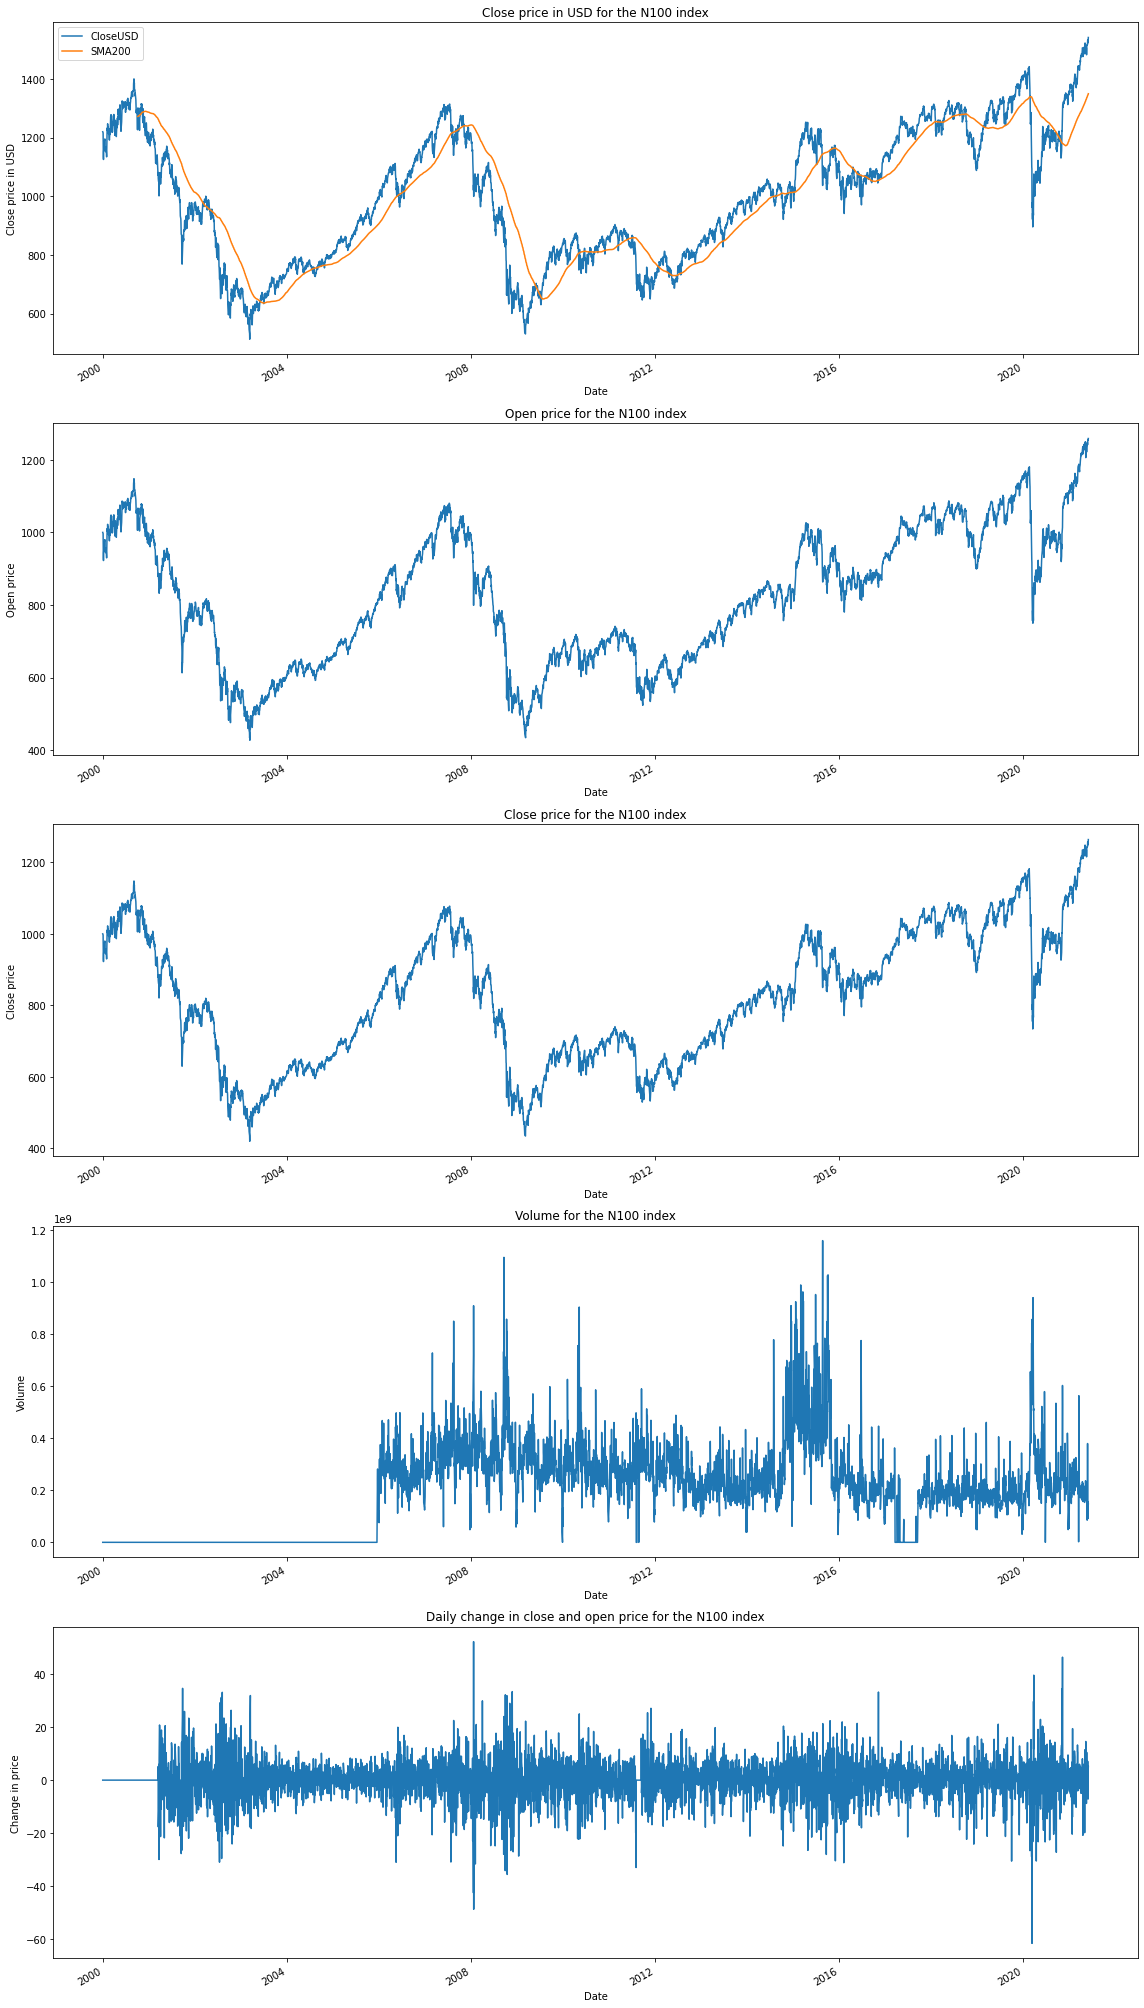

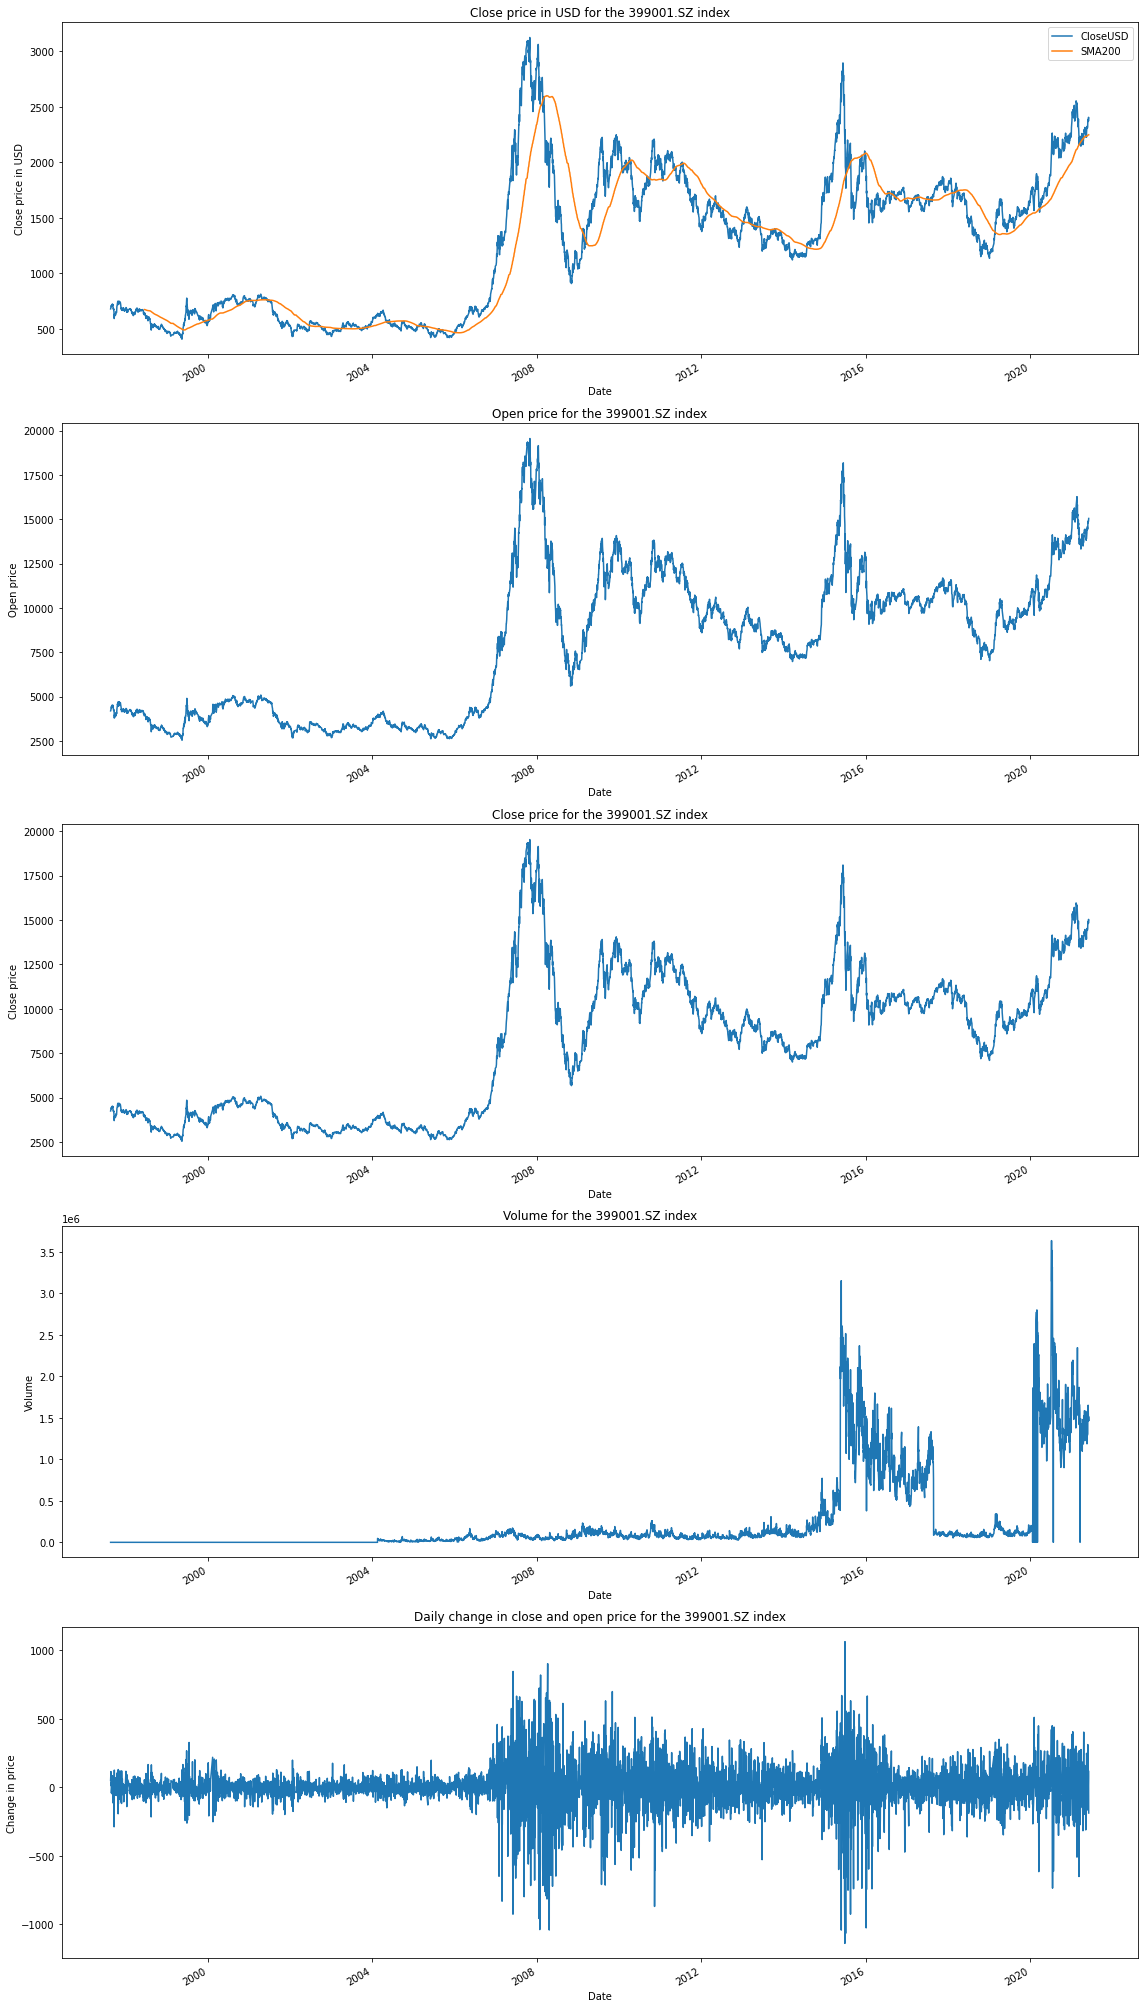

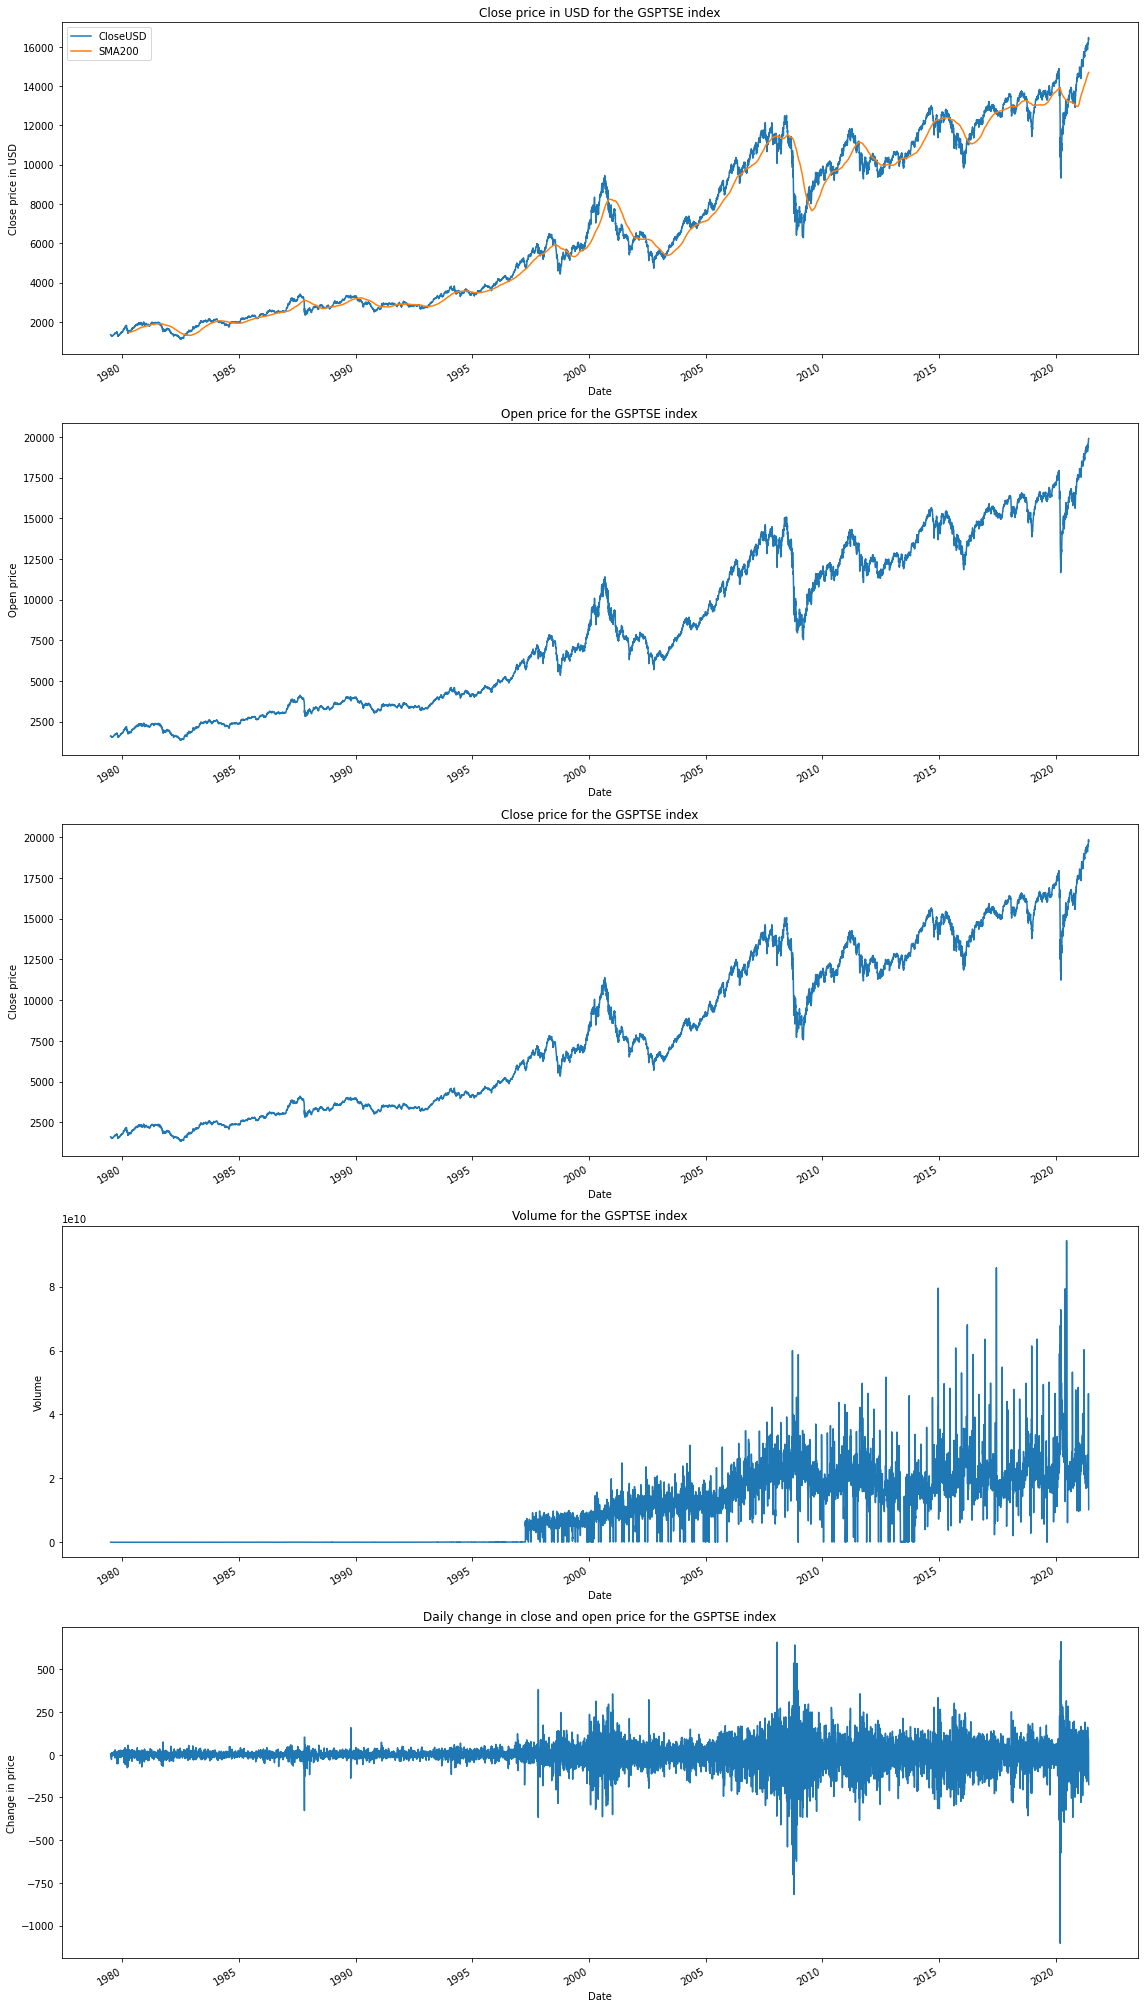

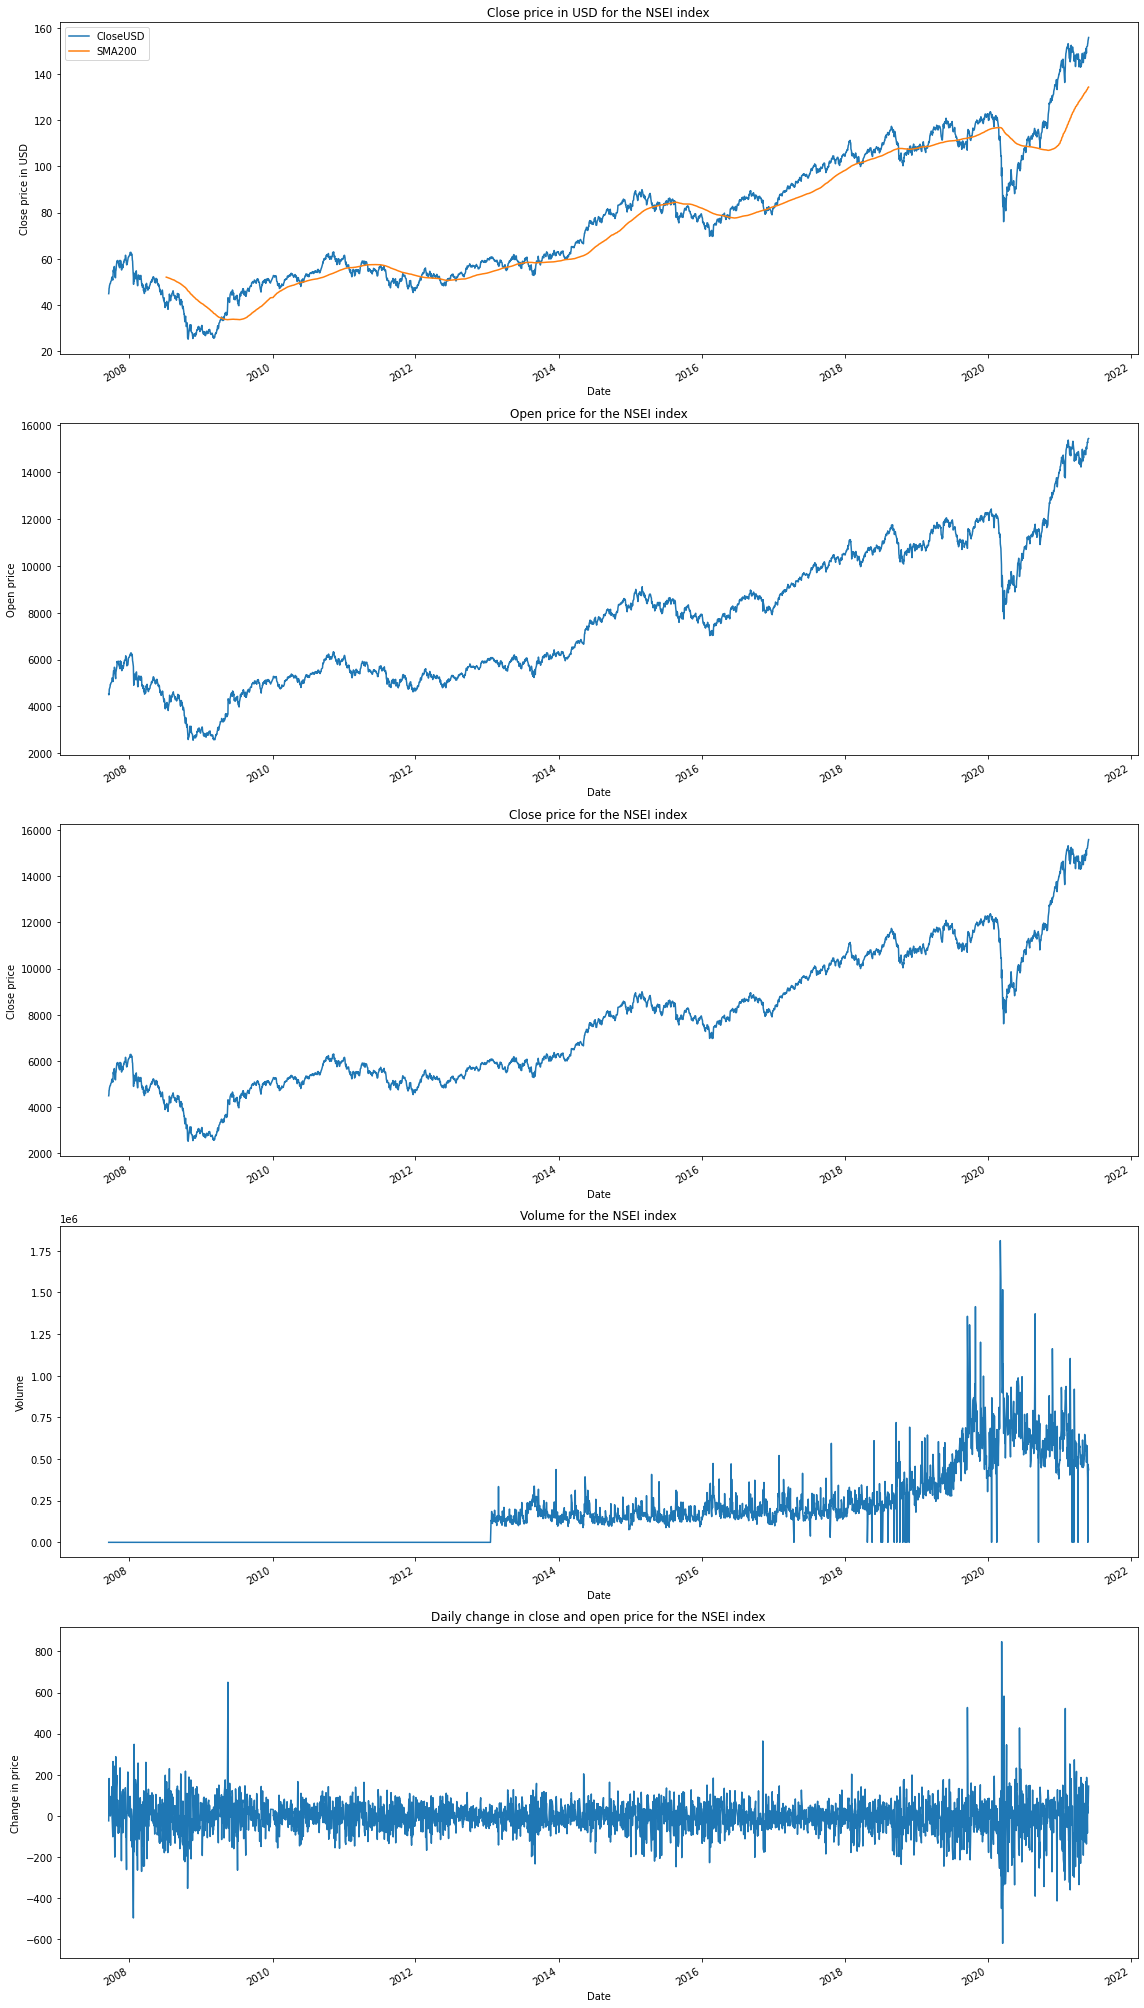

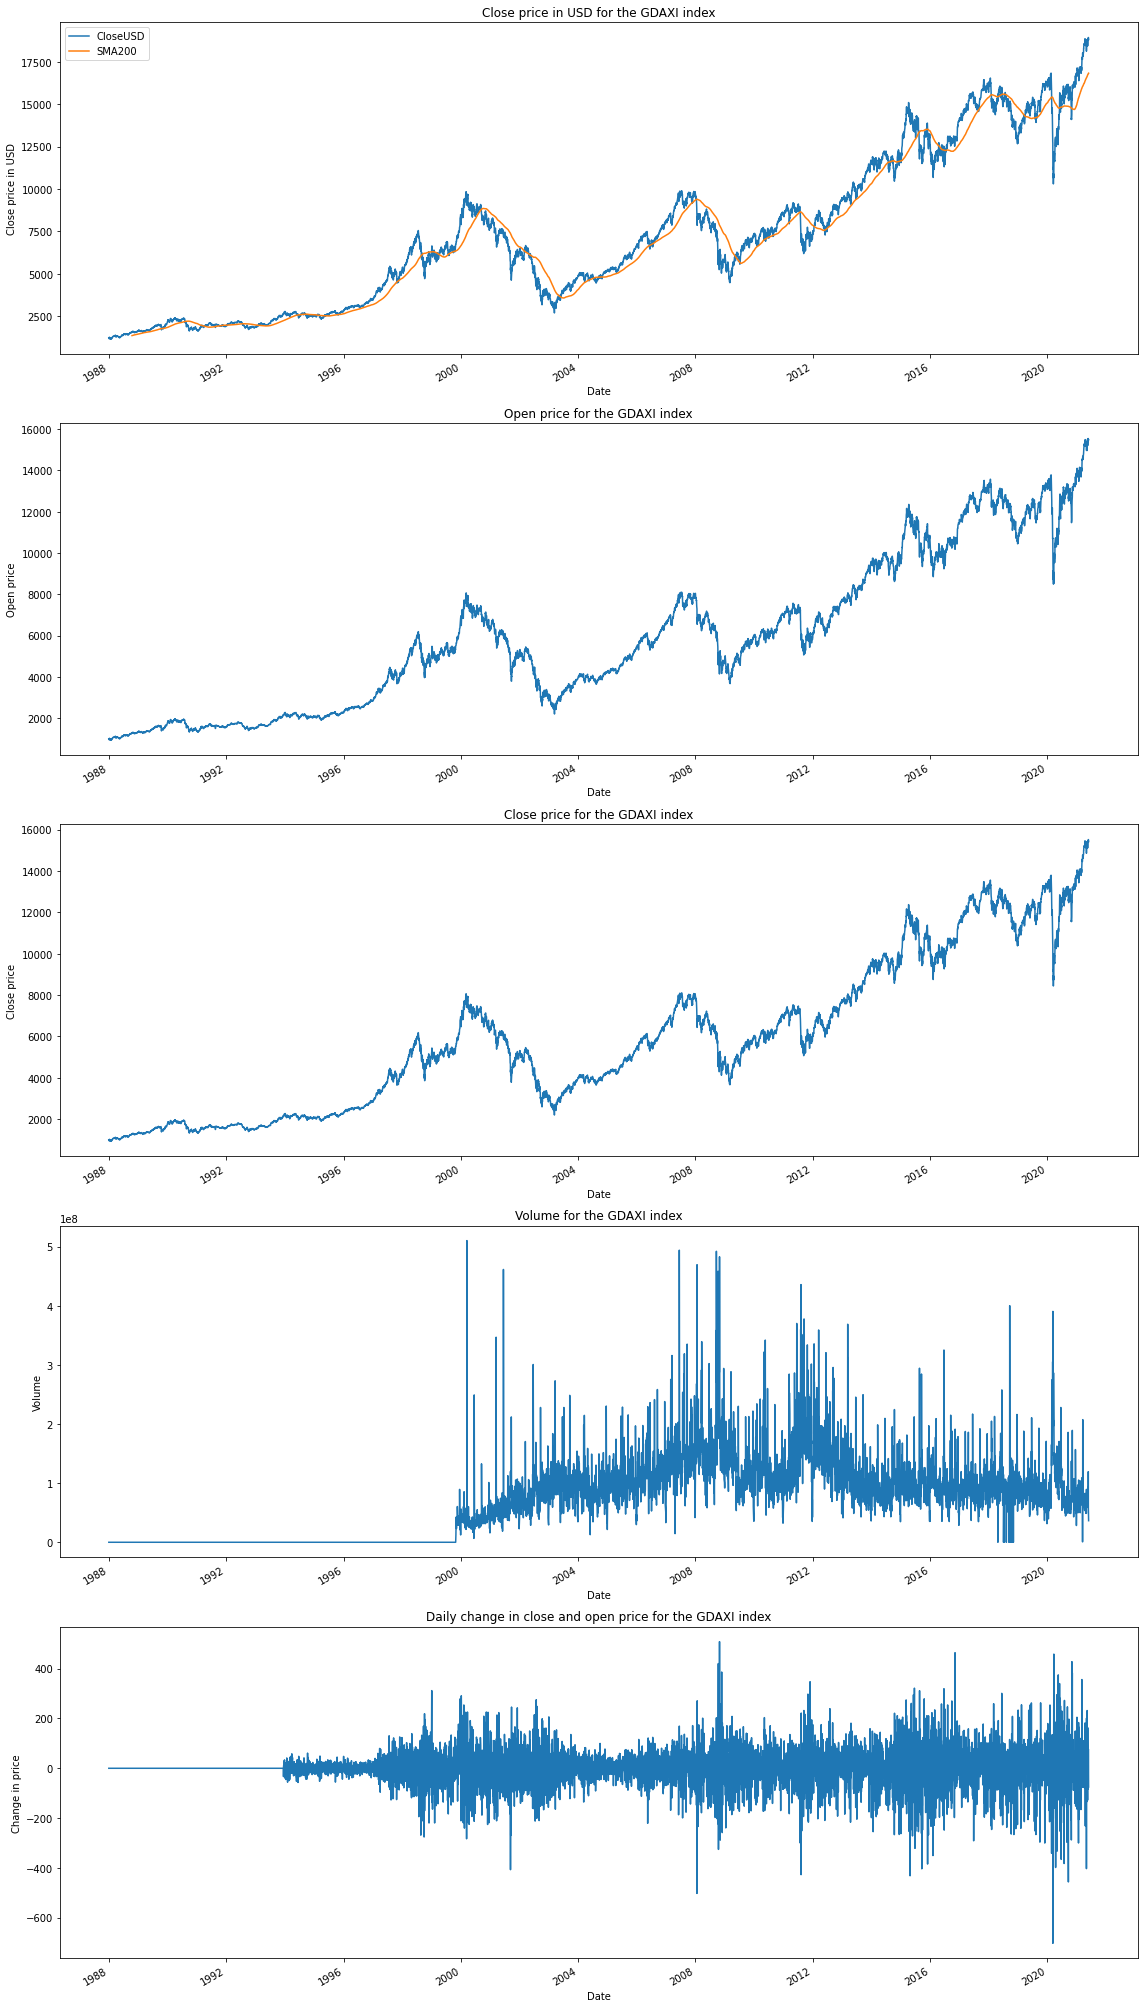

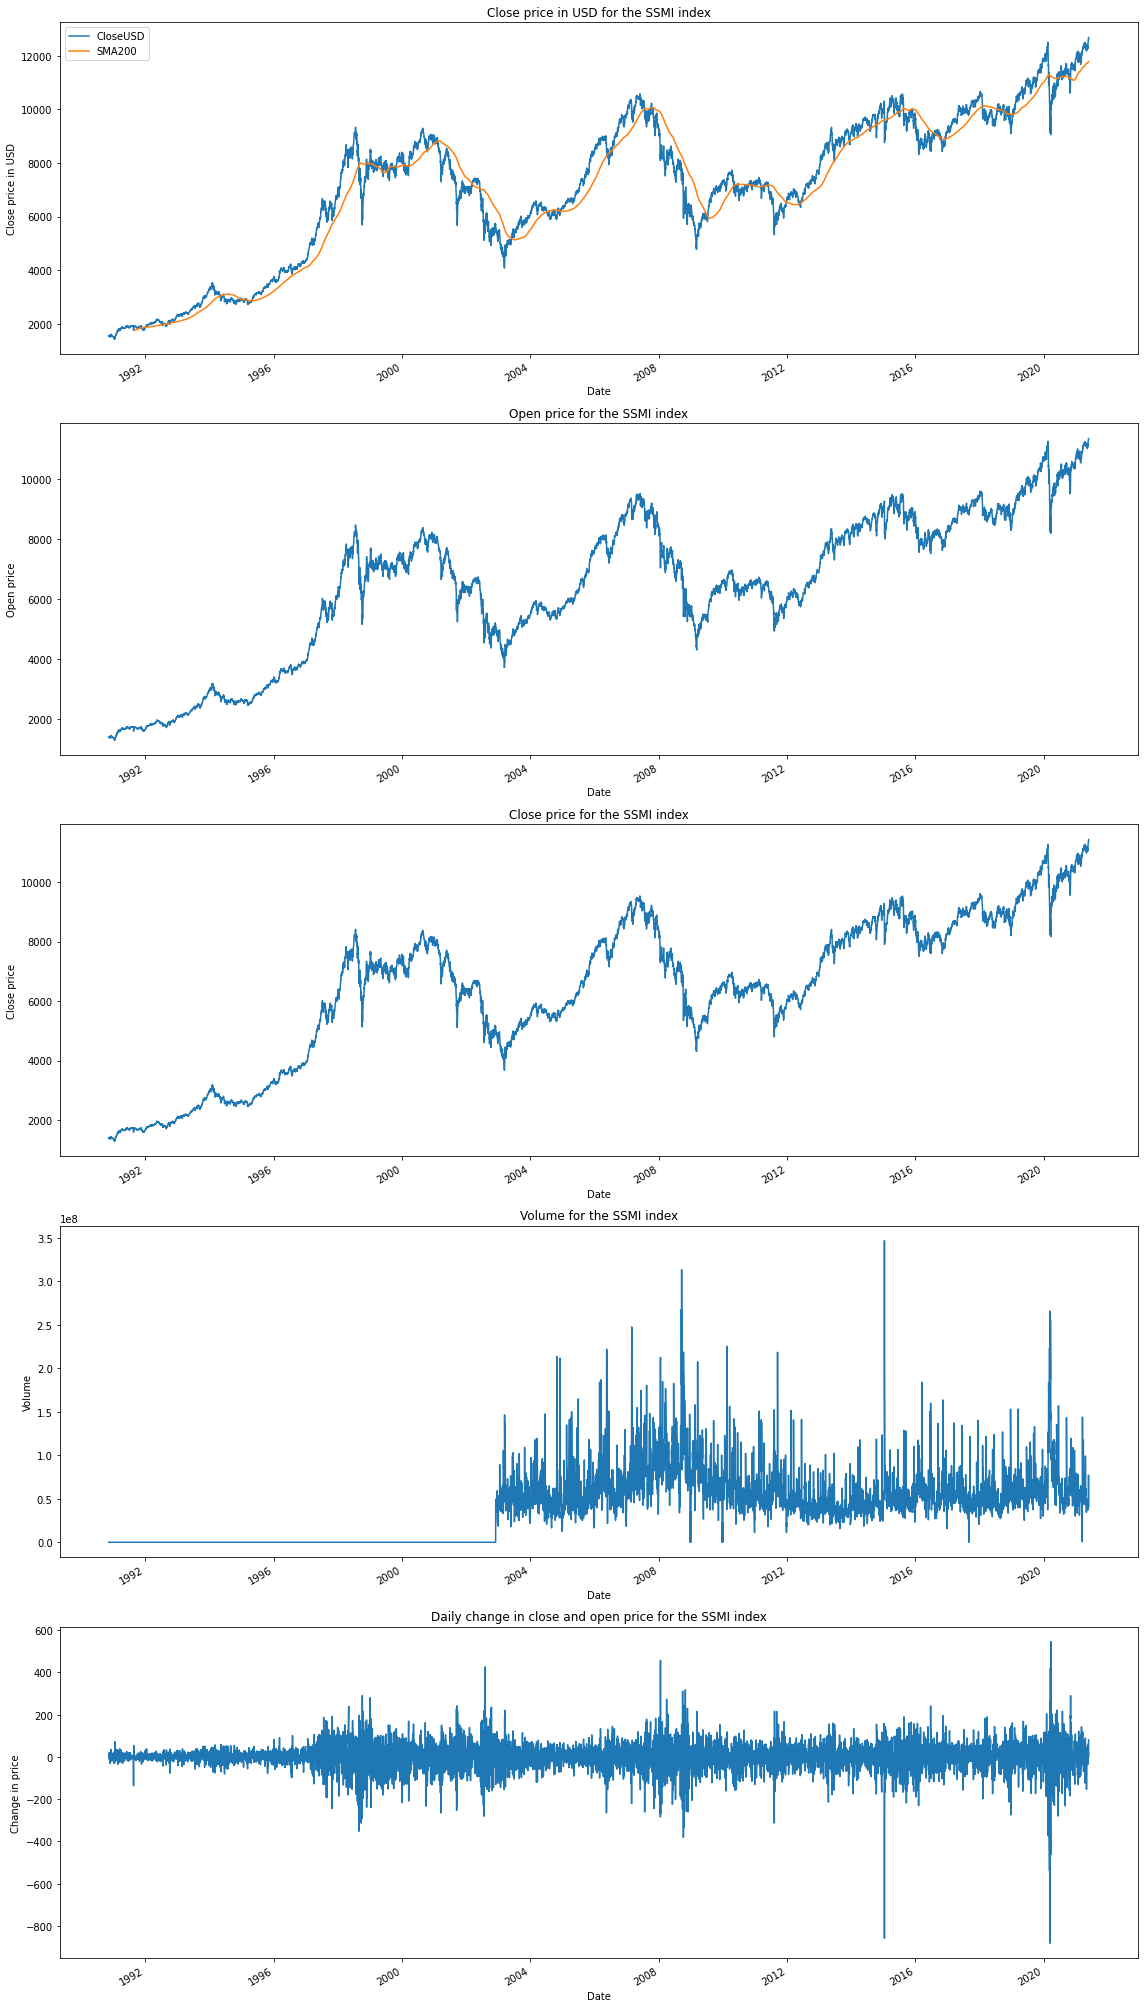

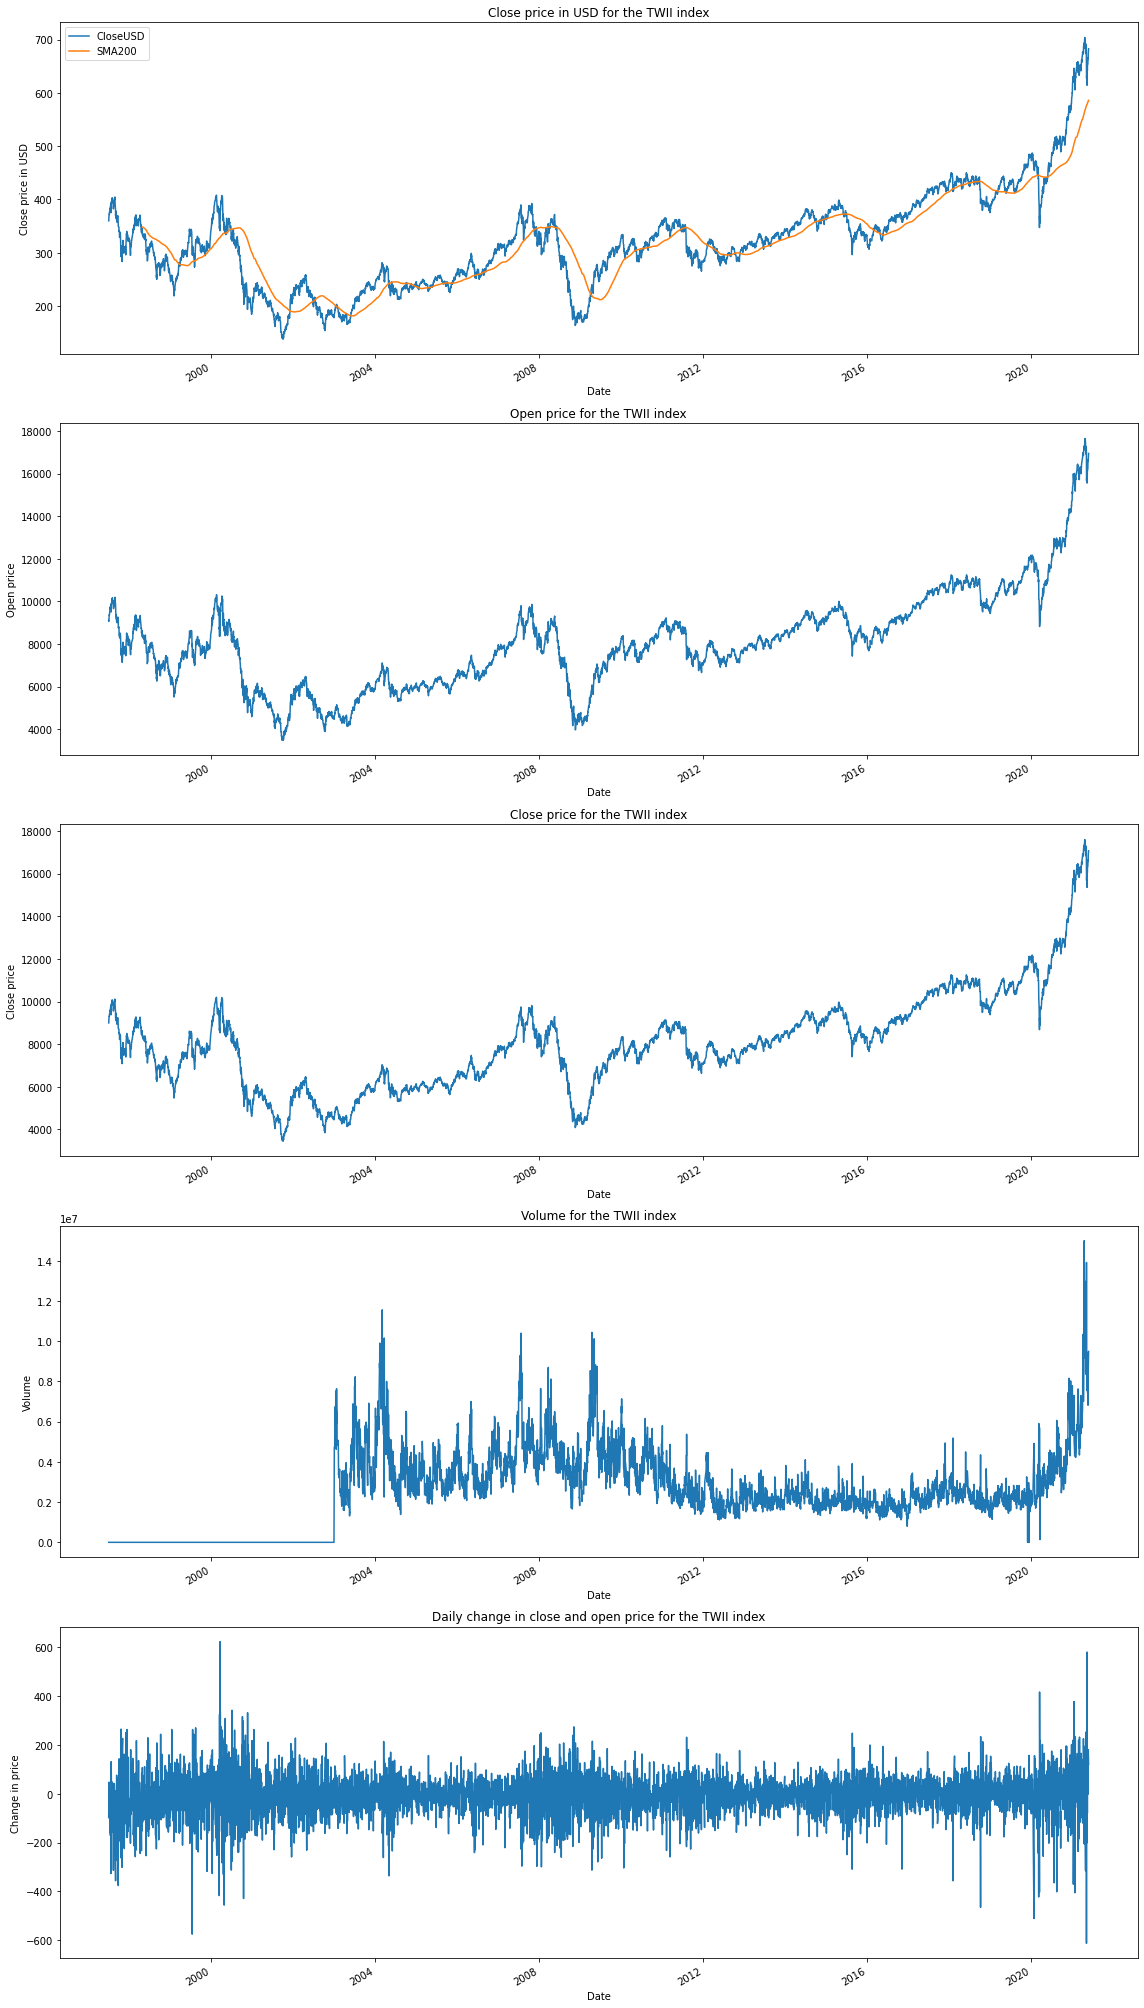

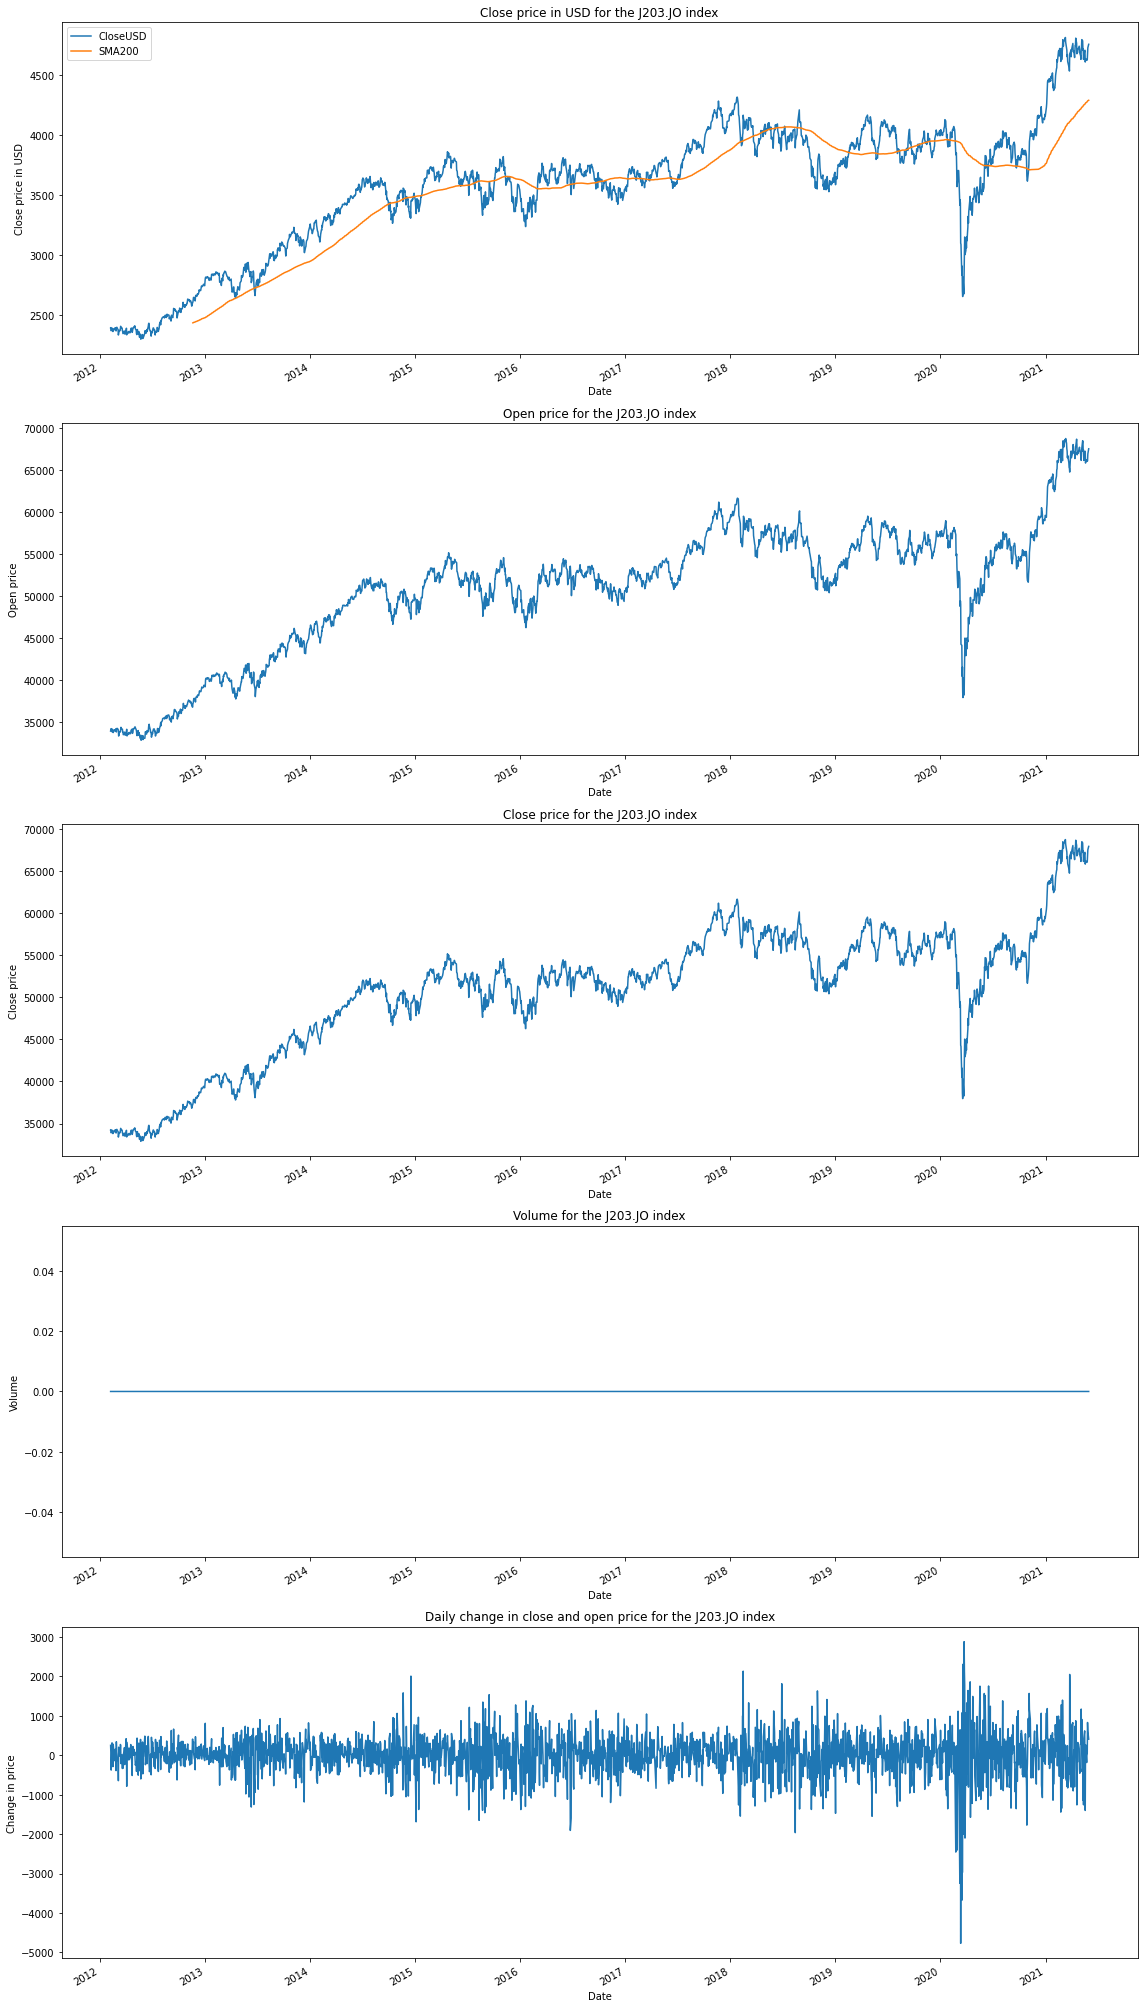

In [44]:
edas()

In [45]:
df = df_merge.copy()
# df = df.drop("Date", axis=1)
df.dropna(inplace=True)
df.head()

Index         Open         High          Low        Close  \
Date                                                                   
1986-12-31   HSI  2568.300049  2568.300049  2568.300049  2568.300049   
1987-01-02   HSI  2540.100098  2540.100098  2540.100098  2540.100098   
1987-01-05   HSI  2552.399902  2552.399902  2552.399902  2552.399902   
1987-01-06   HSI  2583.899902  2583.899902  2583.899902  2583.899902   
1987-01-07   HSI  2607.100098  2607.100098  2607.100098  2607.100098   

              Adj Close  Volume    CloseUSD     Region  \
Date                                                     
1986-12-31  2568.300049     0.0  333.879006  Hong Kong   
1987-01-02  2540.100098     0.0  330.213013  Hong Kong   
1987-01-05  2552.399902     0.0  331.811987  Hong Kong   
1987-01-06  2583.899902     0.0  335.906987  Hong Kong   
1987-01-07  2607.100098     0.0  338.923013  Hong Kong   

                            Exchange Currency  Days since epoch  Change  \
Date                                                                      
1986-12-31  Hong Kong Stock Exchange      HKD              6208     0.0   
1987-01-02  Hong Kong Stock Exchange      HKD              6210     0.0   
1987-01-05  Hong Kong Stock Exchange      HKD              6213     0.0   
1987-01-06  Hong Kong Stock Exchange      HKD              6214     0.0   
1987-01-07  Hong Kong Stock Exchange      HKD              6215     0.0   

            Month  Year  Day  
Date                          
1986-12-31     12  1986   31  
1987-01-02      1  1987    2  
1987-01-05      1  1987    5  
1987-01-06      1  1987    6  
1987-01-07      1  1987    7

In [46]:
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [47]:
def get_metrics(index, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return r2, mae, mse
    
table_data = []

In [48]:
def lr_models():
    indexes = df["Index"].unique()
    for index in indexes:
        data = df.loc[df["Index"]==index]
        
        x = data[["Days since epoch"]]
        y = data["CloseUSD"]
        
#         x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)
        
        lr_model = LinearRegression().fit(x, y)
        
        y_pred = lr_model.predict(x)
        r2, mae, mse = get_metrics(index, y, y_pred)
        
        data["Prediction"] = y_pred
        
        years = 1
        data_future = pd.DataFrame(pd.date_range(data.index[-1] + timedelta(days = 1), data.index[-1] + timedelta(days = 365*years + 1), freq='d'))
        data_future["Days since epoch"] = (data_future[0] - pd.to_datetime("1970-01-01")).dt.days
        
        x_future = data_future[["Days since epoch"]]
        y_future = lr_model.predict(x_future)
        
        data_future["Prediction"] = y_future
        data_future.set_index(0, inplace=True)
        
        fig, ax = plt.subplots(figsize=(16, 10))
        
        plt.title("Close price in USD for the {} index using LR. R^2 score: {}, MAE: {}, MSE: {}".format(index, r2, mae, mse))
        data["CloseUSD"].plot(label="actual", ylabel="Close price in USD")
        data["Prediction"].plot(label="past prediction", color="r")
        data_future["Prediction"].plot(label="future prediction", color="g")
        
        table_data.append([index, "linear regression", r2*100, mae, mse])
        
        ax.legend()
        
        print("Metric scores for {}\nR-squared: {}\nMAE: {}\nMSE: {}".format(index, r2, mae, mse))
        
        fig.tight_layout()
#         plt.savefig("lr_prediction_plot_for_{}.png".format(index), facecolor='w', transparent=False)
        plt.show()

['HSI', 'linear regression', 89.31274509759525, 265.8706801883541, 119271.12182401409]
['NYA', 'linear regression', 87.47463685113148, 1223.9394923234506, 2080234.6260837805]
['IXIC', 'linear regression', 65.01269545473617, 1038.1752349991996, 2172119.6316394014]
['000001.SS', 'linear regression', 42.51333304983649, 75.03298545047417, 12323.046230036944]
['N225', 'linear regression', 34.260595616665334, 48.61584070111618, 4234.911736990545]
['N100', 'linear regression', 18.89284752379279, 167.2259985579323, 39696.2745085325]
['399001.SZ', 'linear regression', 50.27768325832862, 327.45066979172634, 199773.50032278406]
['GSPTSE', 'linear regression', 93.00651883218197, 888.6726481182012, 1170620.5492468188]
['NSEI', 'linear regression', 87.16677070743957, 7.829683063438705, 103.04812204088972]
['GDAXI', 'linear regression', 85.02465344051669, 1385.6519559114256, 2968529.958399323]
['SSMI', 'linear regression', 70.9085219997445, 1196.998171661333, 2134948.9887833623]
['TWII', 'linear regr

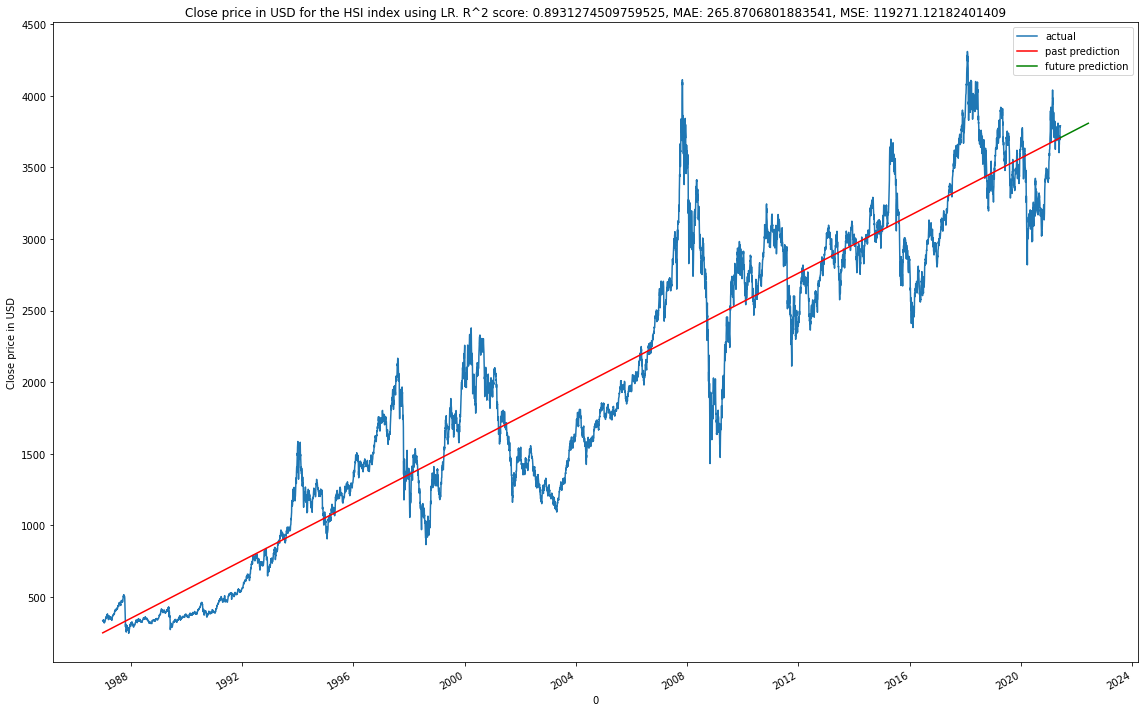

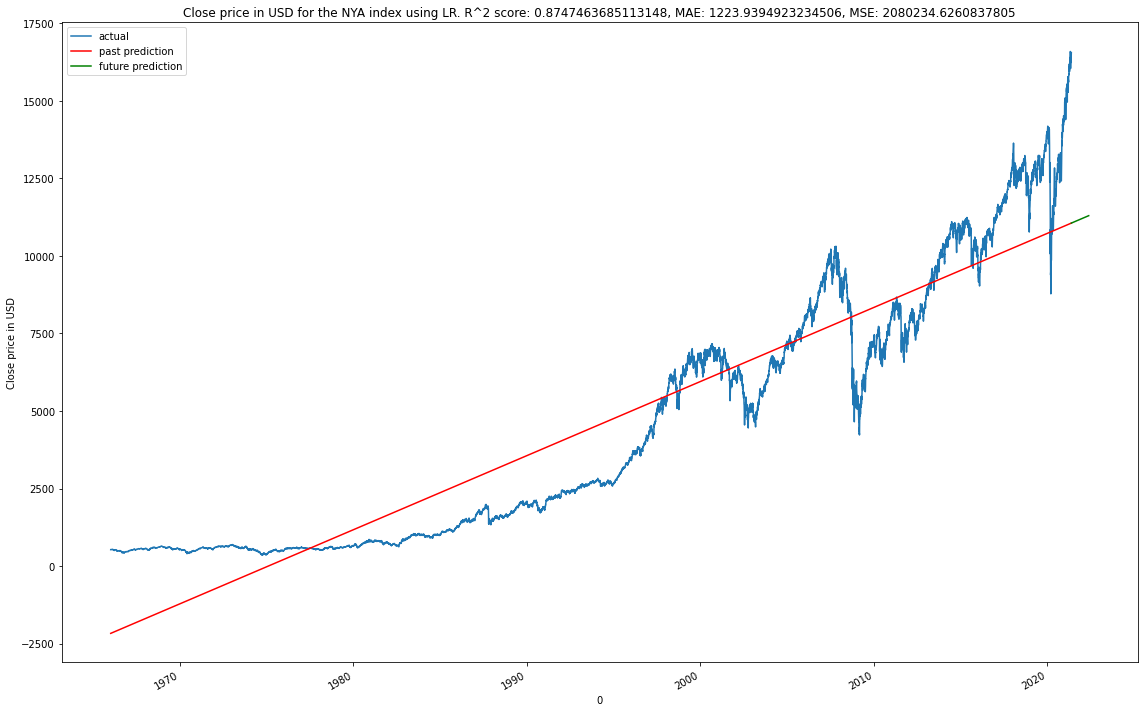

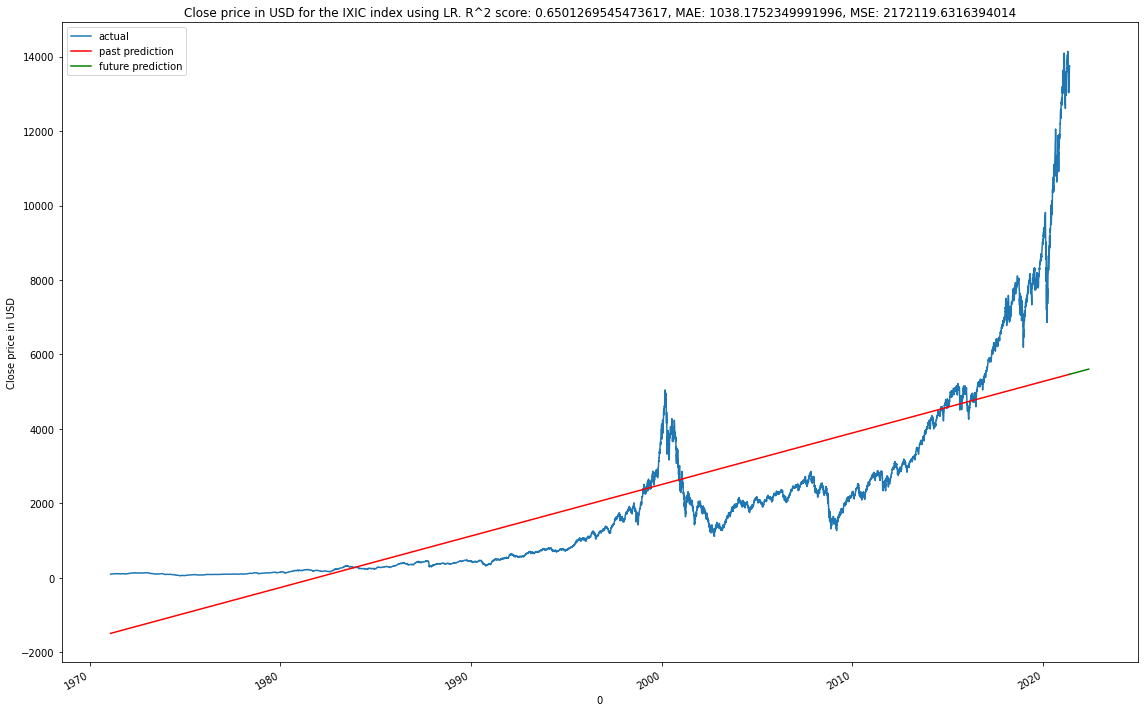

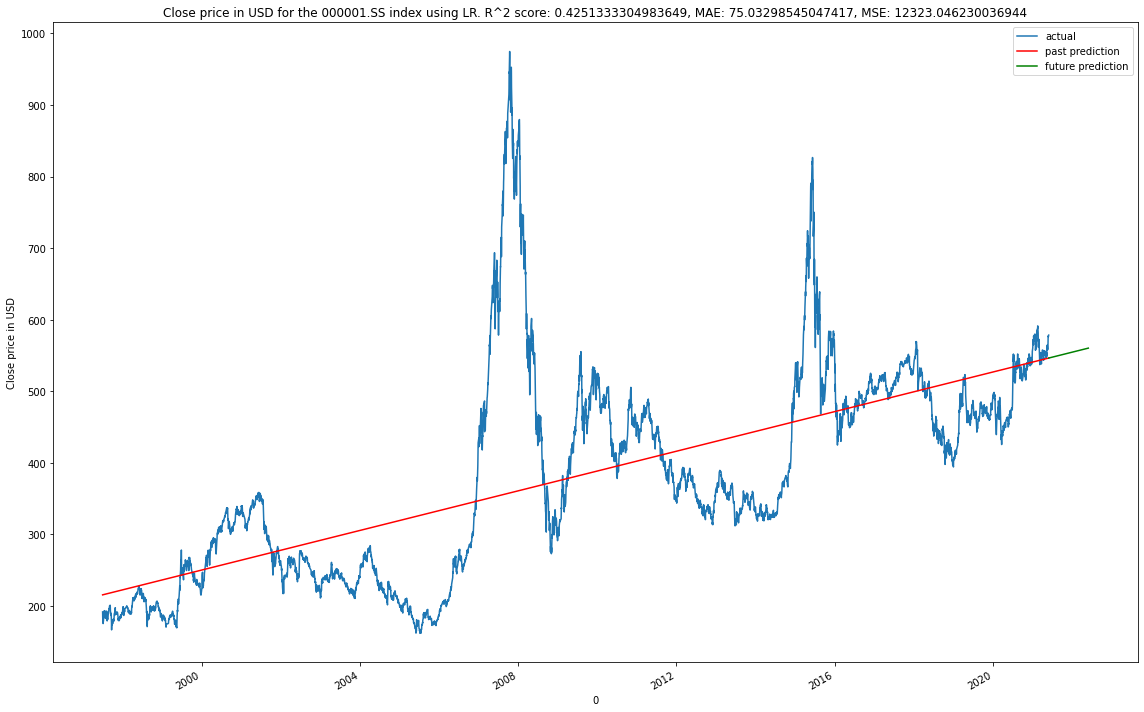

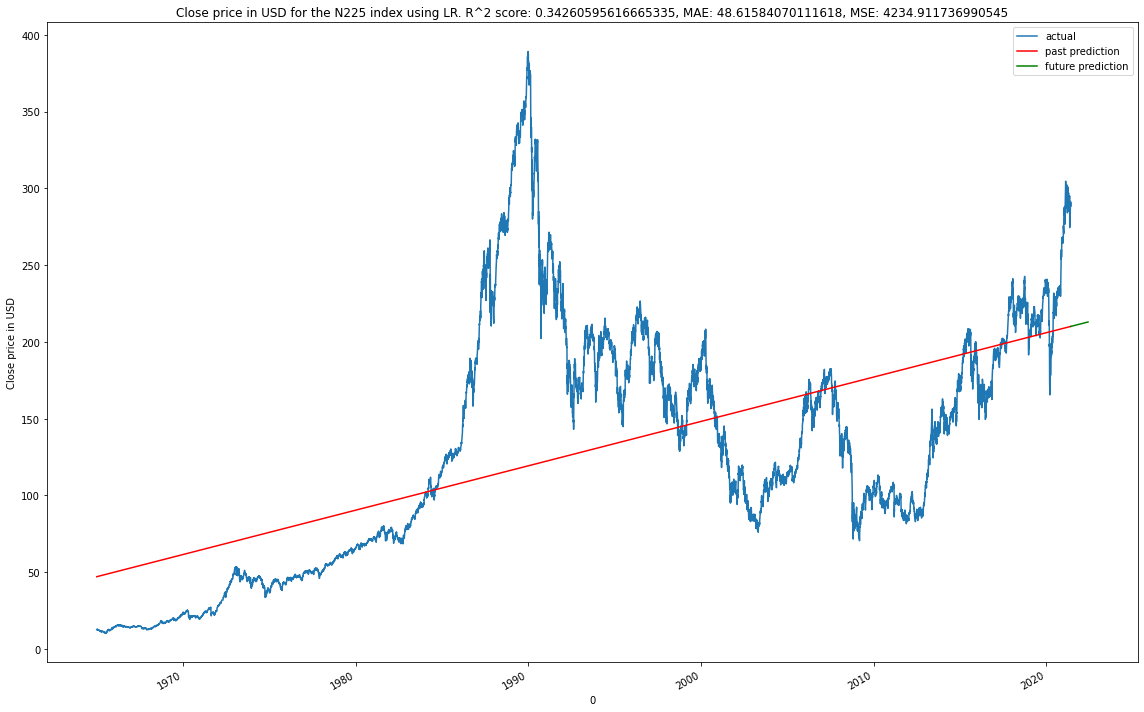

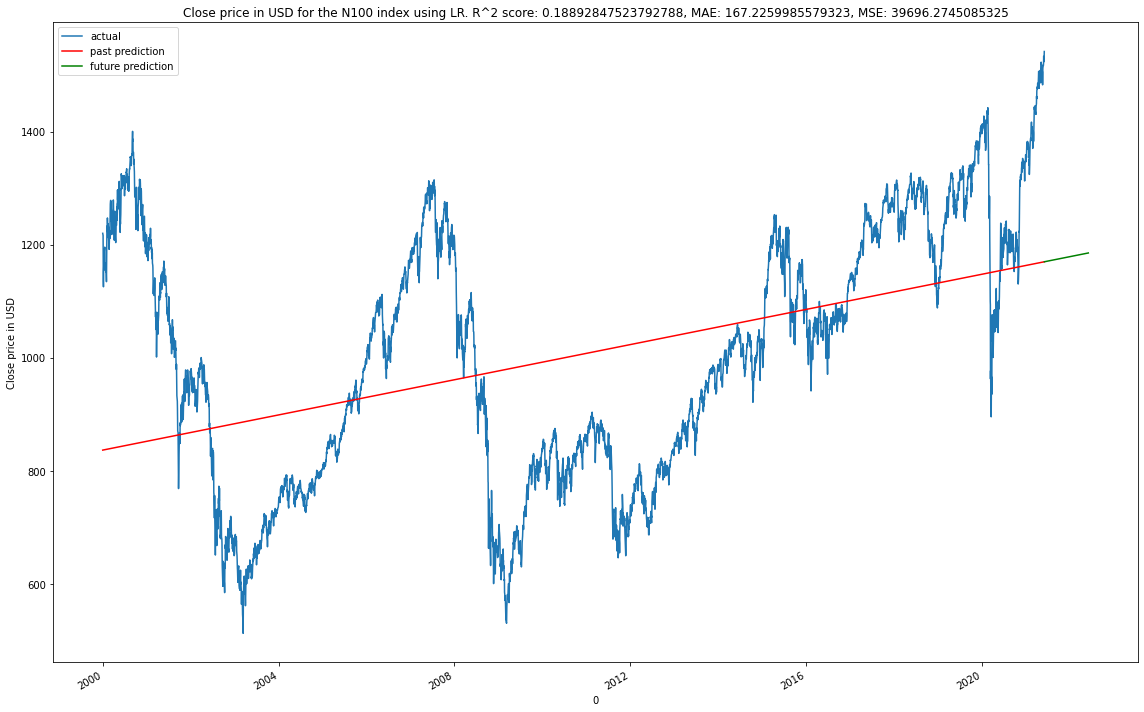

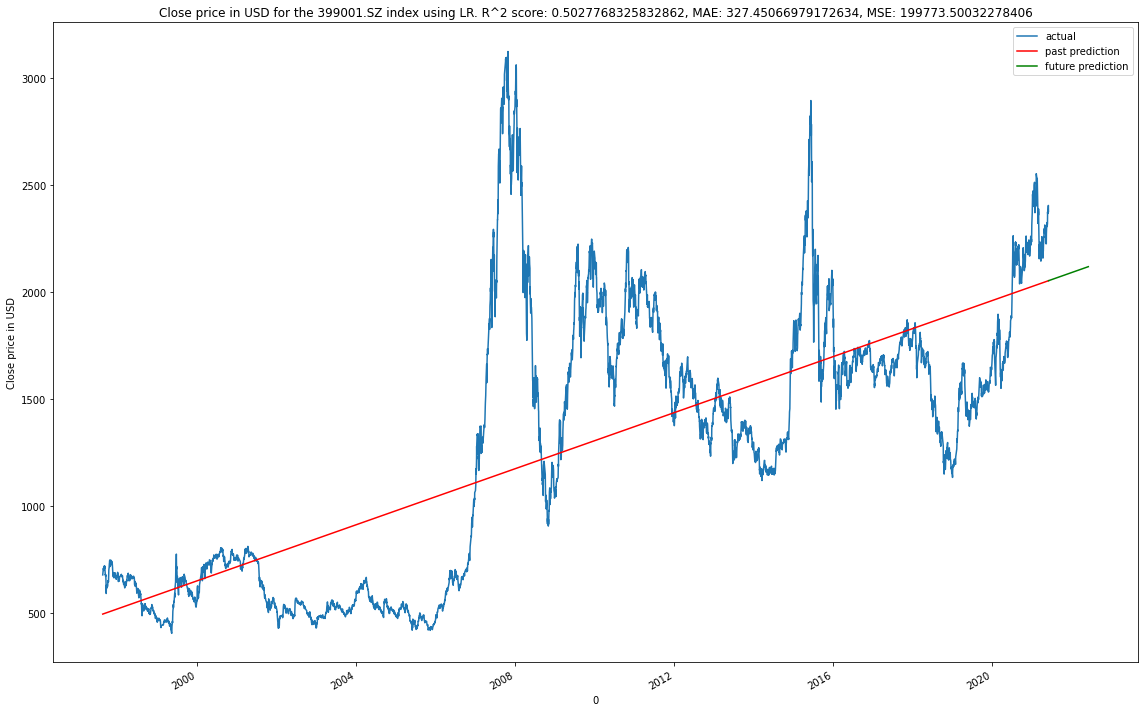

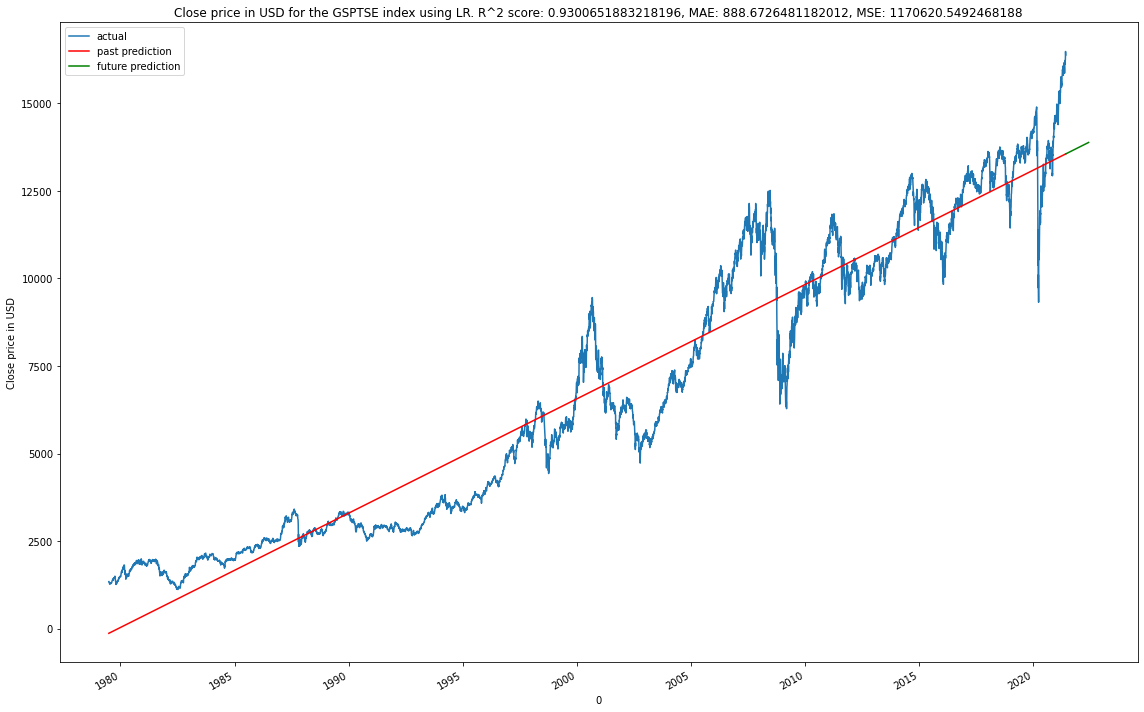

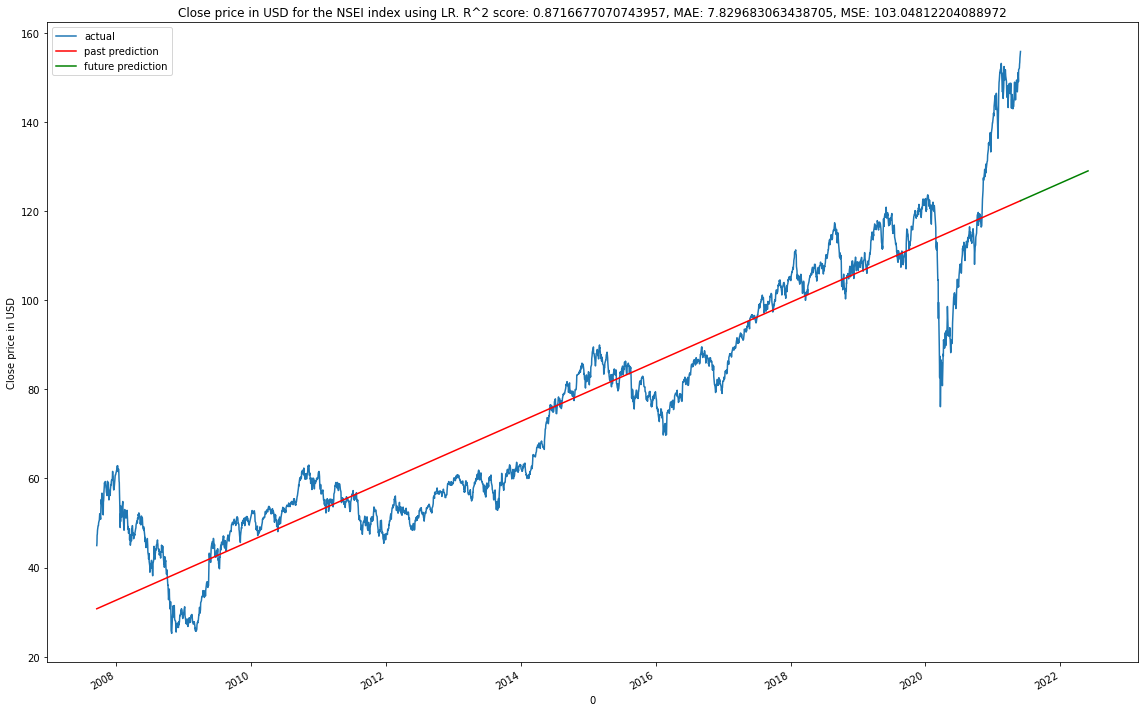

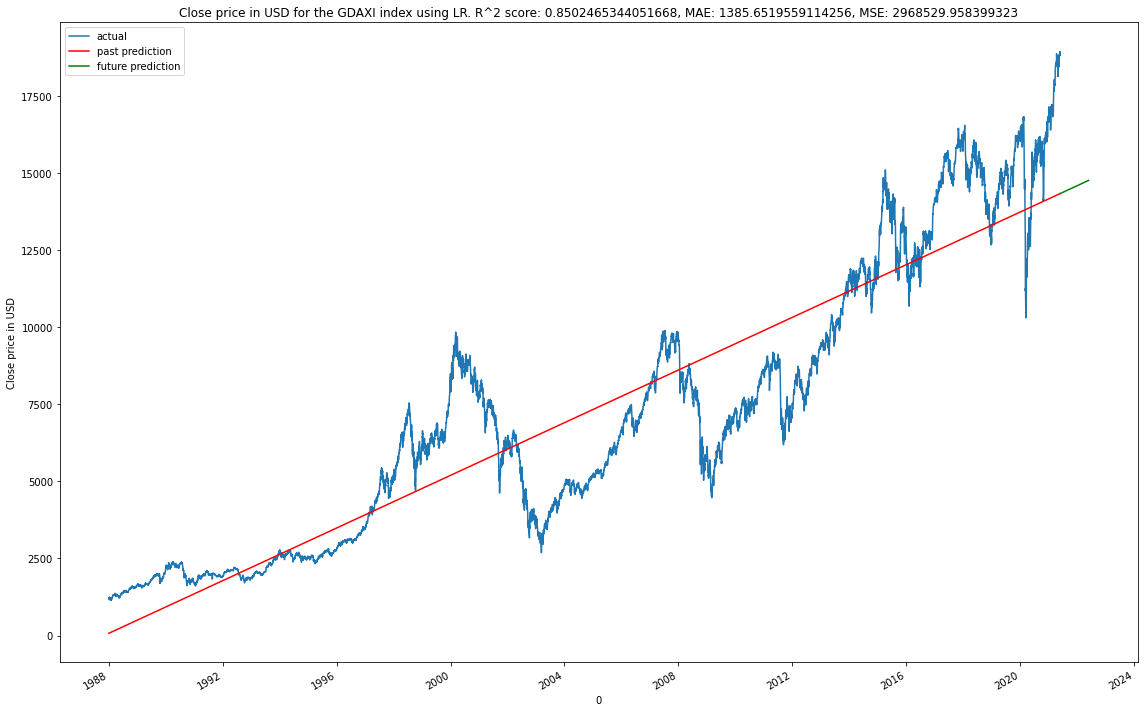

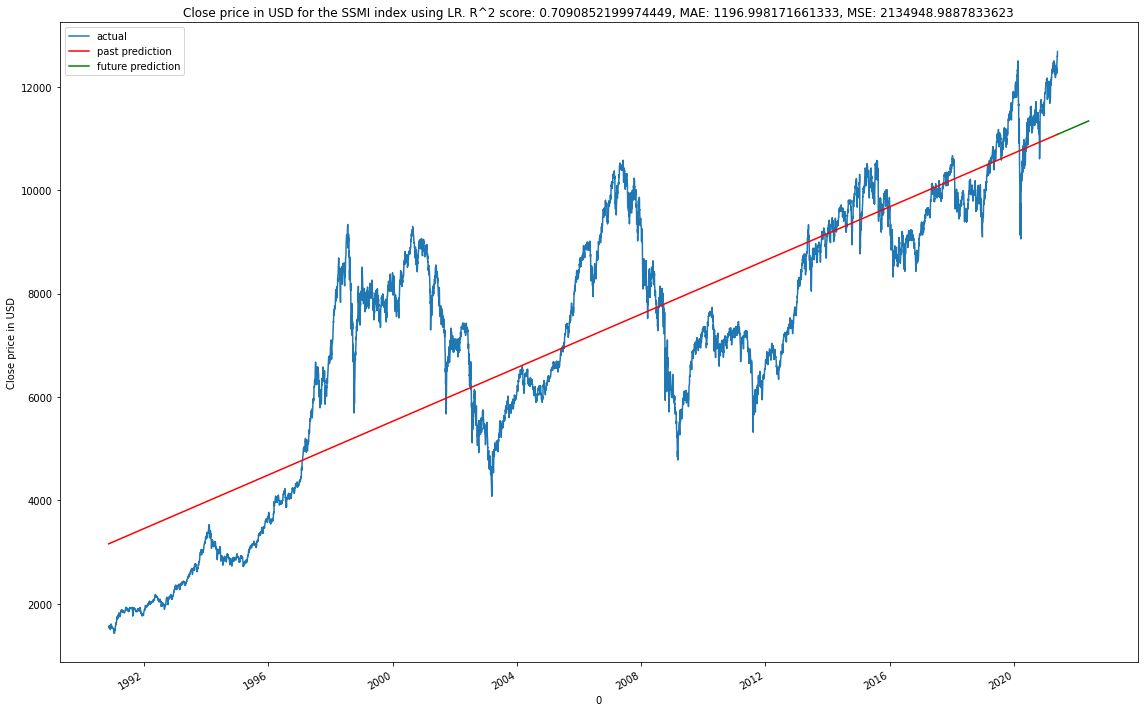

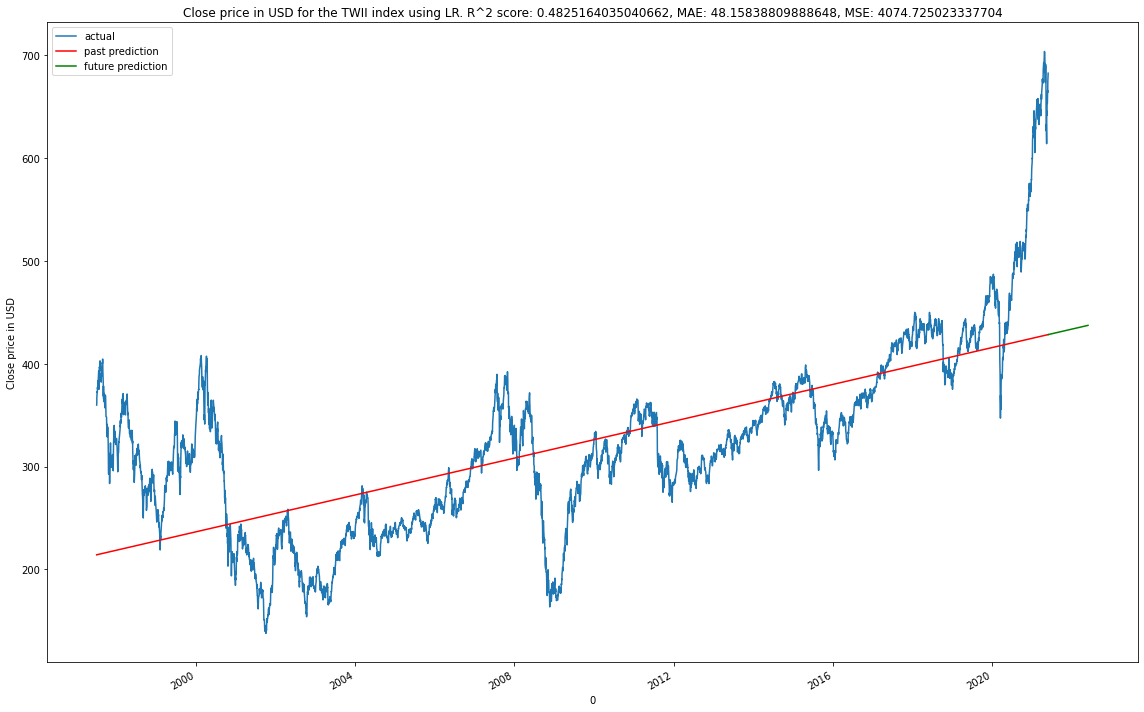

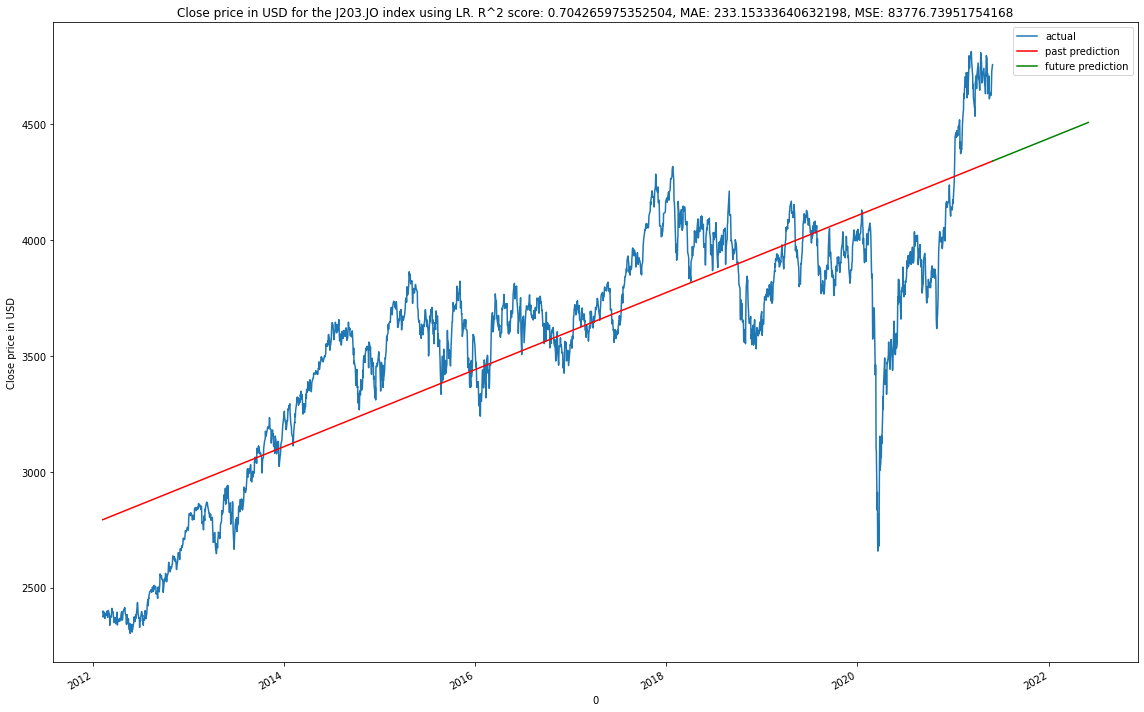

In [49]:
lr_models()
# for data in table_data:
#     print(data)

In [50]:
def pr_models(index):
    best = {"r2_score": 0, "mae": 0, "mse": 0, "data": 0, "degree": 0, "future": 0}
    
    data = df.loc[df["Index"]==index]
    
    x = data[["Days since epoch"]]
    y = data["CloseUSD"]
    for degree in range(2, 30):        
        pf = PolynomialFeatures(degree=degree)
        x_transform = pf.fit_transform(x)
        
#         x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = 0.3, random_state=1)
        
        pr_model = LinearRegression().fit(x_transform, y)
        
        y_pred = pr_model.predict(x_transform)
        
        r2, mae, mse = get_metrics(index, y, y_pred)
        
        if r2 > best["r2_score"]:
            best["r2_score"] = r2
            best["mae"] = mae
            best["mse"] = mse
            data["Prediction"] = y_pred
            best["data"] = data
            best["degree"] = degree
            
            years = 1
            data_future = pd.DataFrame(pd.date_range(data.index[-1] + timedelta(days = 1), data.index[-1] + timedelta(days = 365*years + 1), freq='d'))
            data_future["Days since epoch"] = (data_future[0] - pd.to_datetime("1970-01-01")).dt.days

            x_future = data_future[["Days since epoch"]]
            x_future_transform = pf.fit_transform(x_future)
            y_future = pr_model.predict(x_future_transform)

            data_future["Prediction"] = y_future
            data_future.set_index(0, inplace=True)
            
            best["future"] = data_future
    
    fig, ax = plt.subplots(figsize=(16, 10))

    plt.title("Close price in USD for the {} index using PR (degree: {}). R^2 score: {}, MAE: {}, MSE: {}".format(index, best["degree"], best["r2_score"], best["mae"], best["mse"]))
    data["CloseUSD"].plot(label="actual", ylabel="Close price in USD")
    data["Prediction"].plot(label="past prediction", color="r")
    best["future"]["Prediction"].plot(label="future prediction", color="g")
    
    table_data.append([index, "polynomial regression", best["r2_score"]*100, best["mae"], best["mse"]])
    
    ax.legend()
    
    fig.tight_layout()
#     plt.savefig("pr_prediction_plot_for_{}.png".format(index), facecolor='w', transparent=False)
    plt.show()
    print("Metric scores for {} with degree {}\nR-squared: {}\nMAE: {}\nMSE: {}".format(index, best["degree"], best["r2_score"], best["mae"], best["mse"]))

['HSI', 'linear regression', 89.31274509759525, 265.8706801883541, 119271.12182401409]
['NYA', 'linear regression', 87.47463685113148, 1223.9394923234506, 2080234.6260837805]
['IXIC', 'linear regression', 65.01269545473617, 1038.1752349991996, 2172119.6316394014]
['000001.SS', 'linear regression', 42.51333304983649, 75.03298545047417, 12323.046230036944]
['N225', 'linear regression', 34.260595616665334, 48.61584070111618, 4234.911736990545]
['N100', 'linear regression', 18.89284752379279, 167.2259985579323, 39696.2745085325]
['399001.SZ', 'linear regression', 50.27768325832862, 327.45066979172634, 199773.50032278406]
['GSPTSE', 'linear regression', 93.00651883218197, 888.6726481182012, 1170620.5492468188]
['NSEI', 'linear regression', 87.16677070743957, 7.829683063438705, 103.04812204088972]
['GDAXI', 'linear regression', 85.02465344051669, 1385.6519559114256, 2968529.958399323]
['SSMI', 'linear regression', 70.9085219997445, 1196.998171661333, 2134948.9887833623]
['TWII', 'linear regr

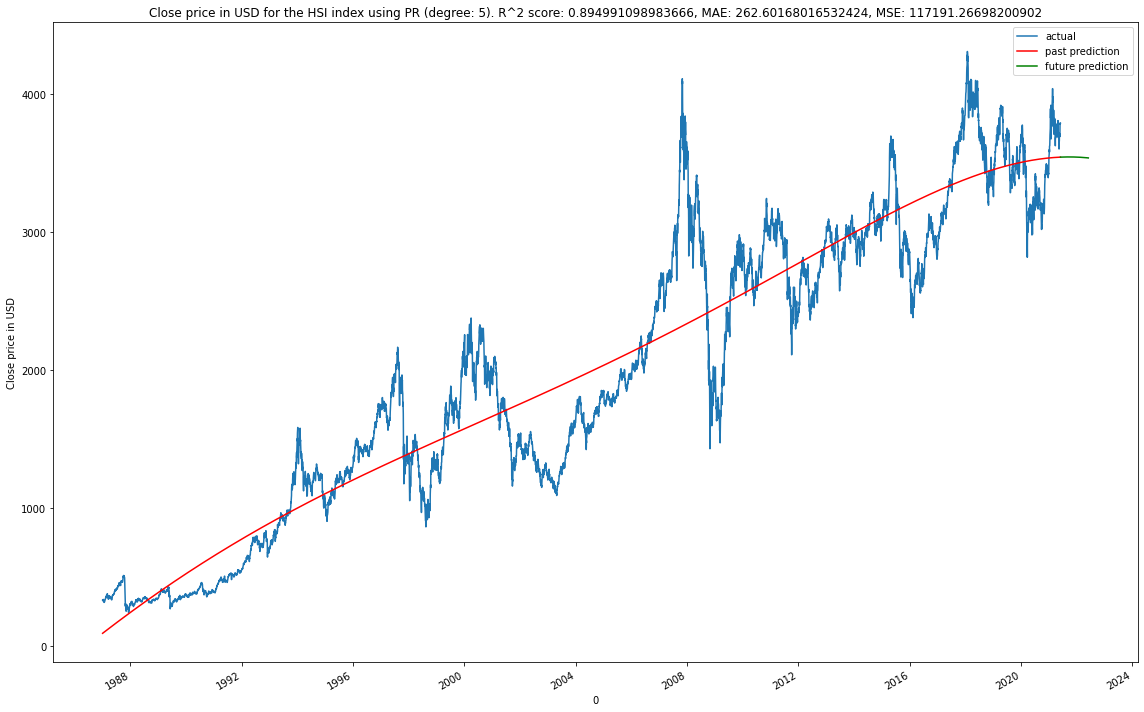

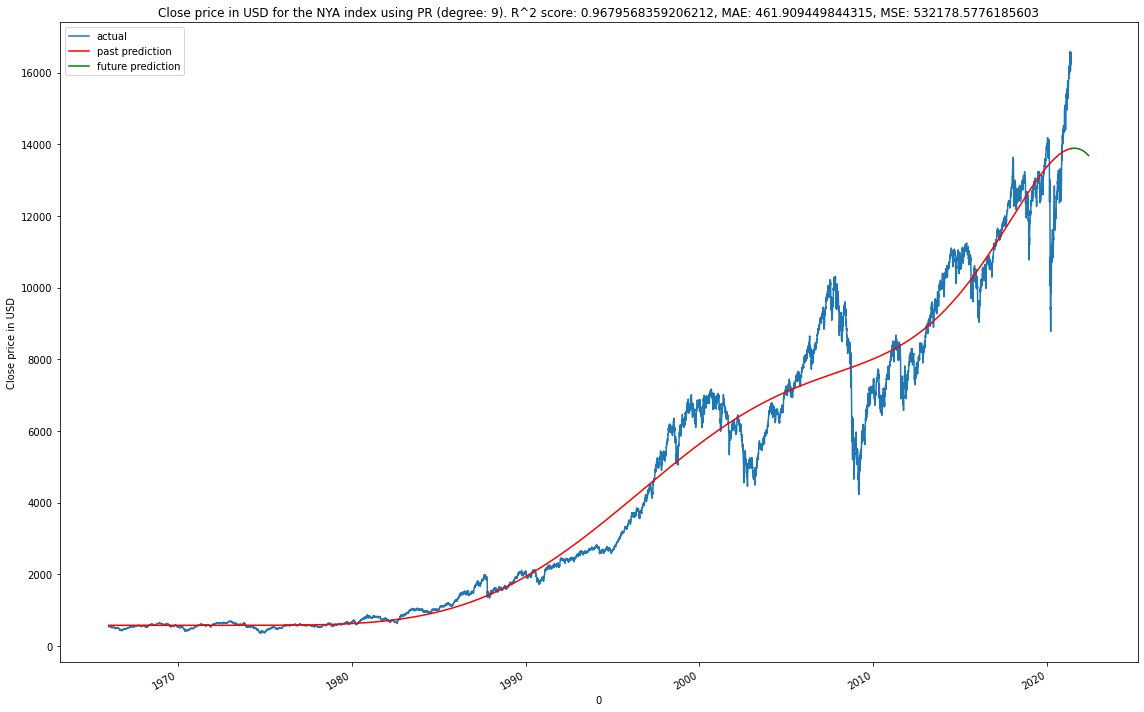

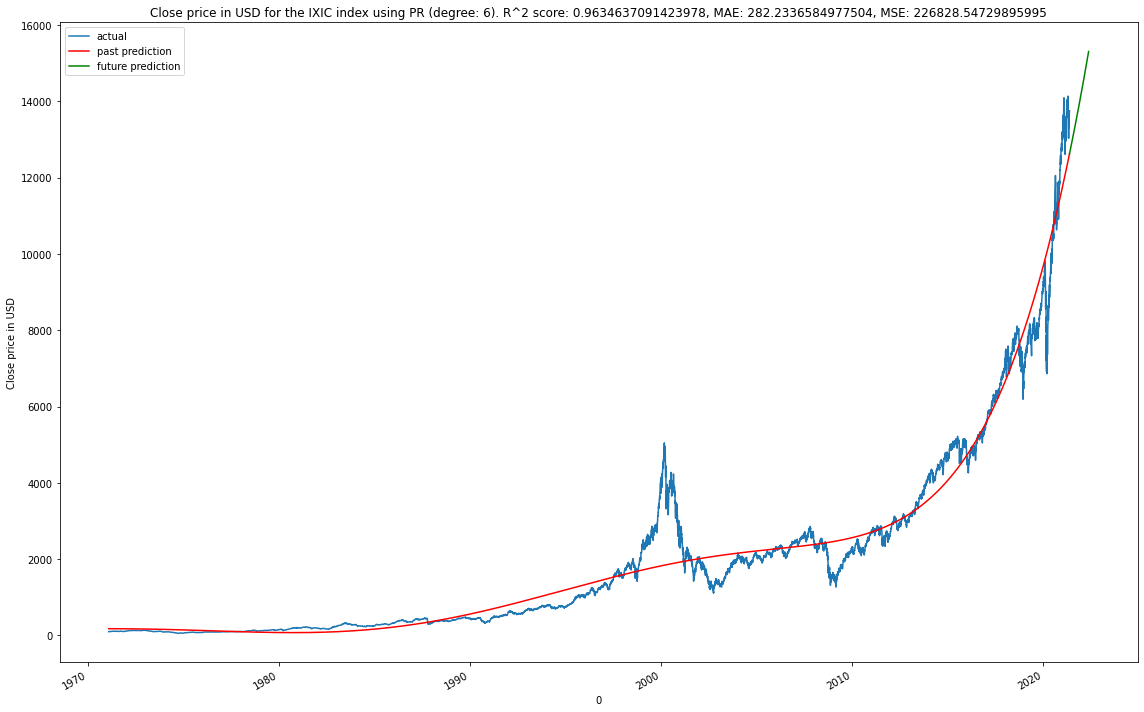

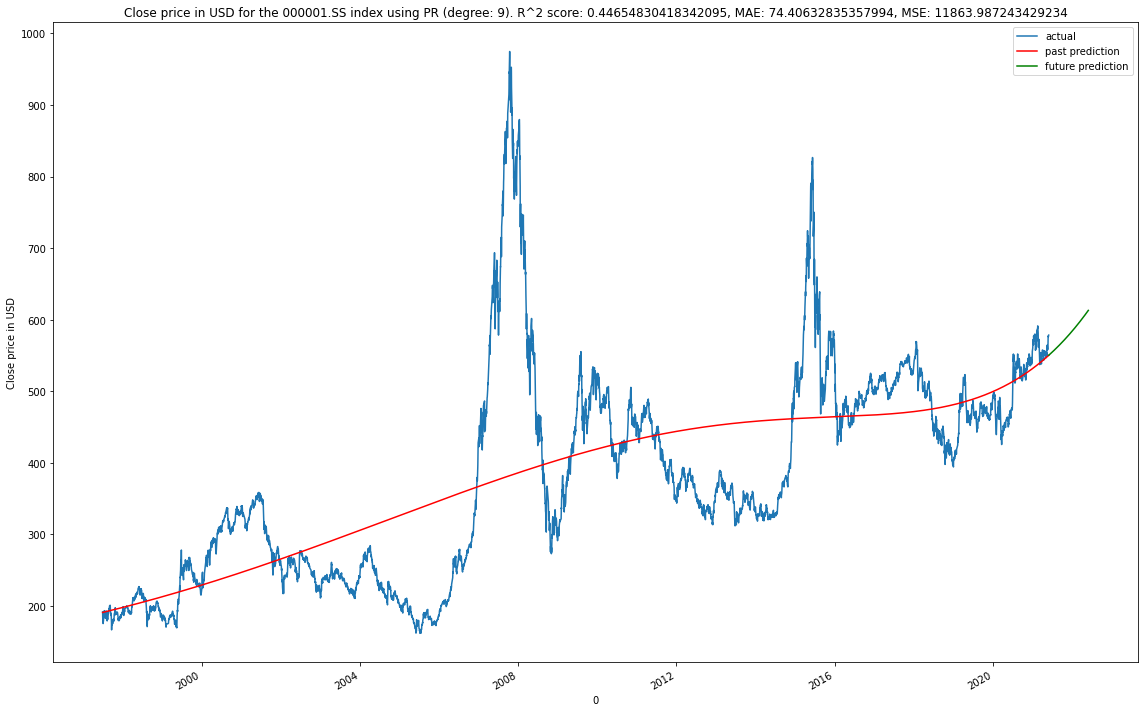

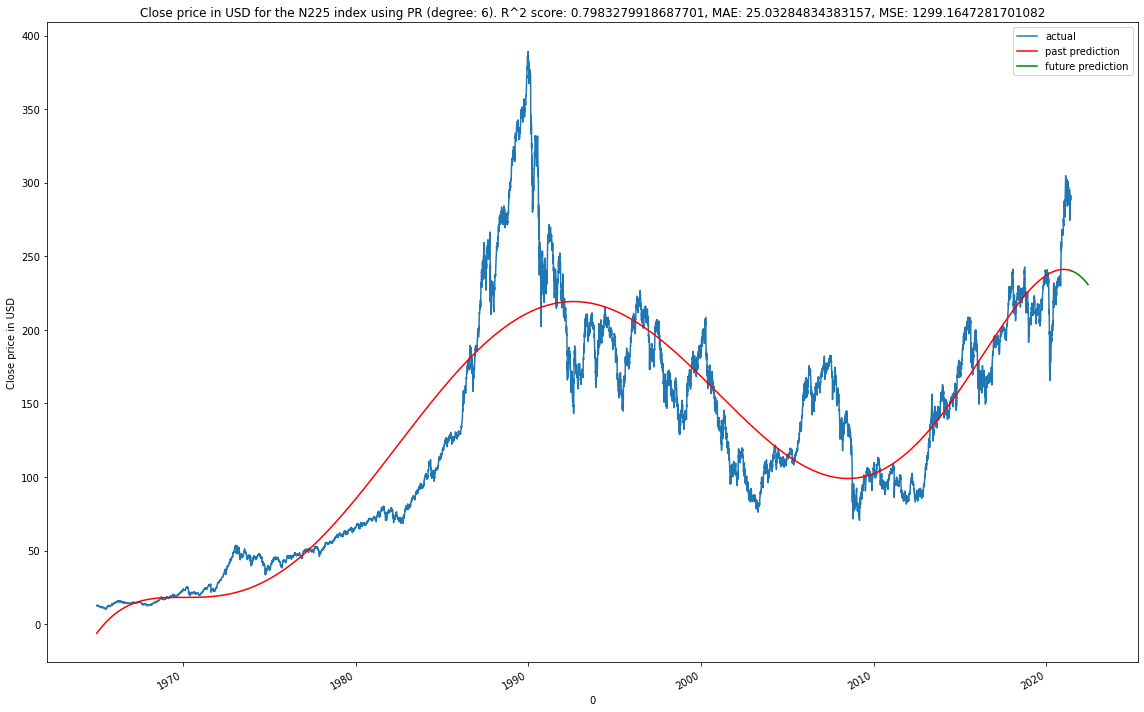

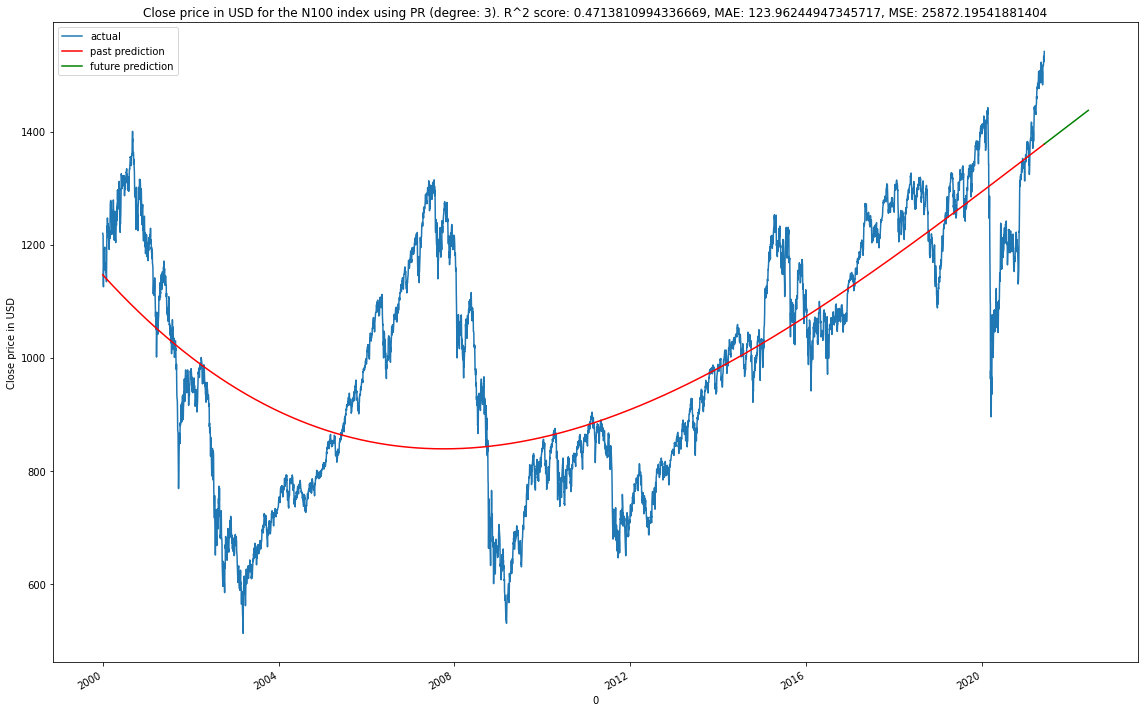

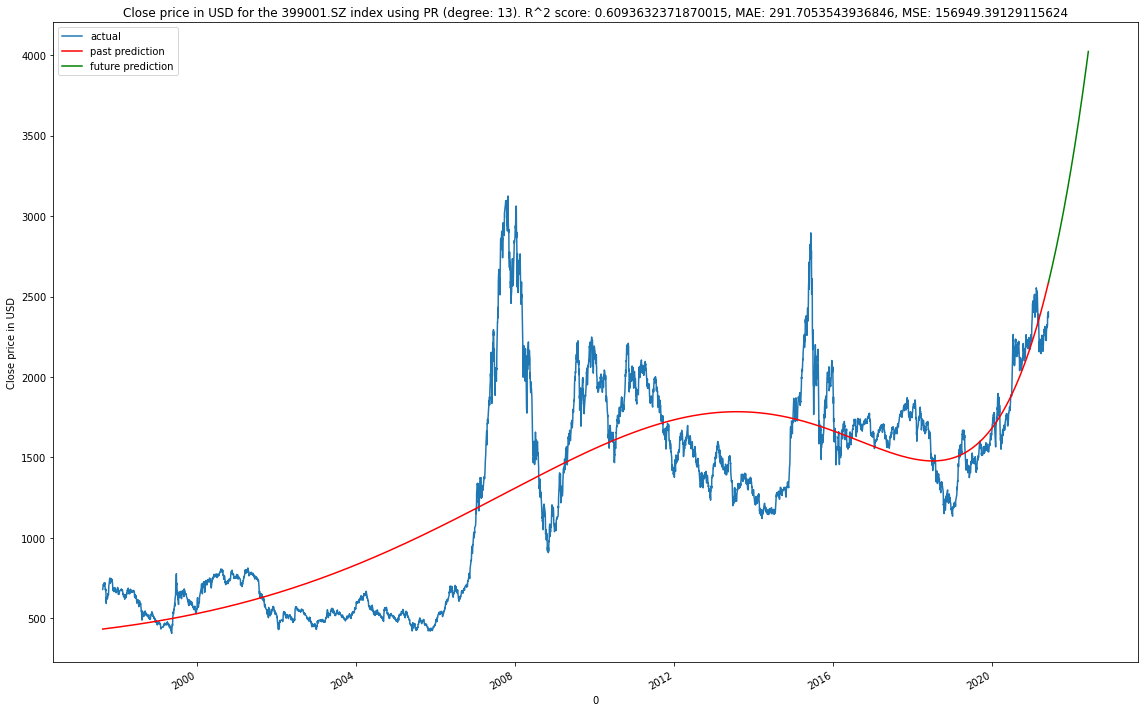

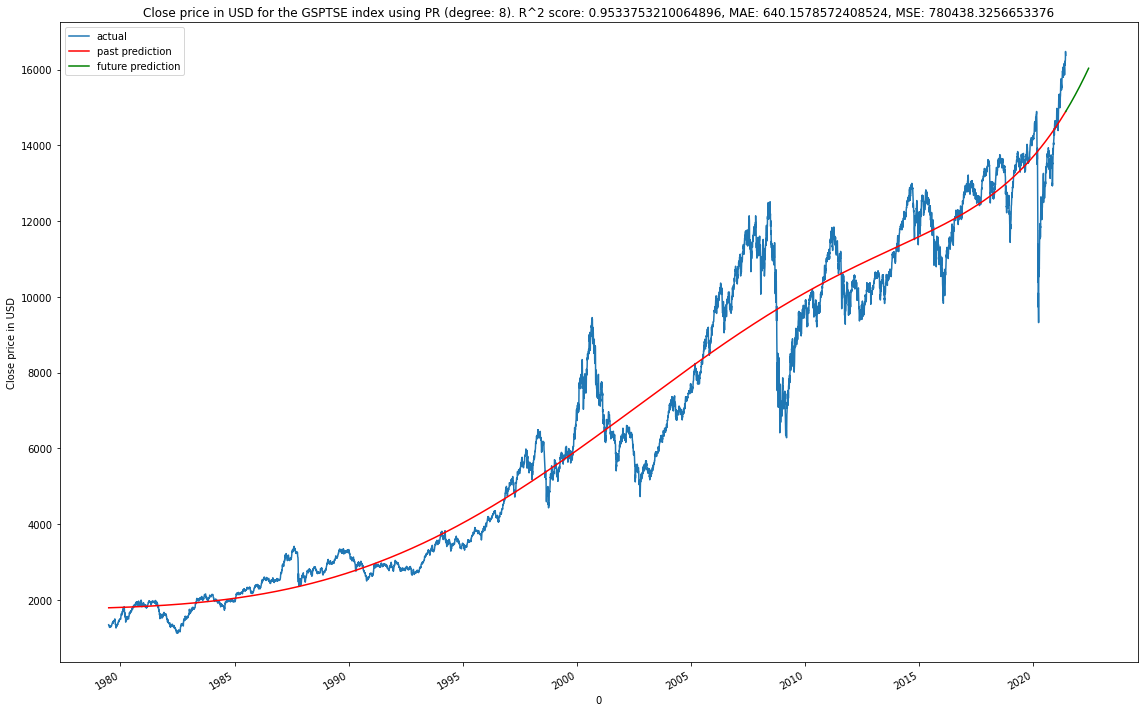

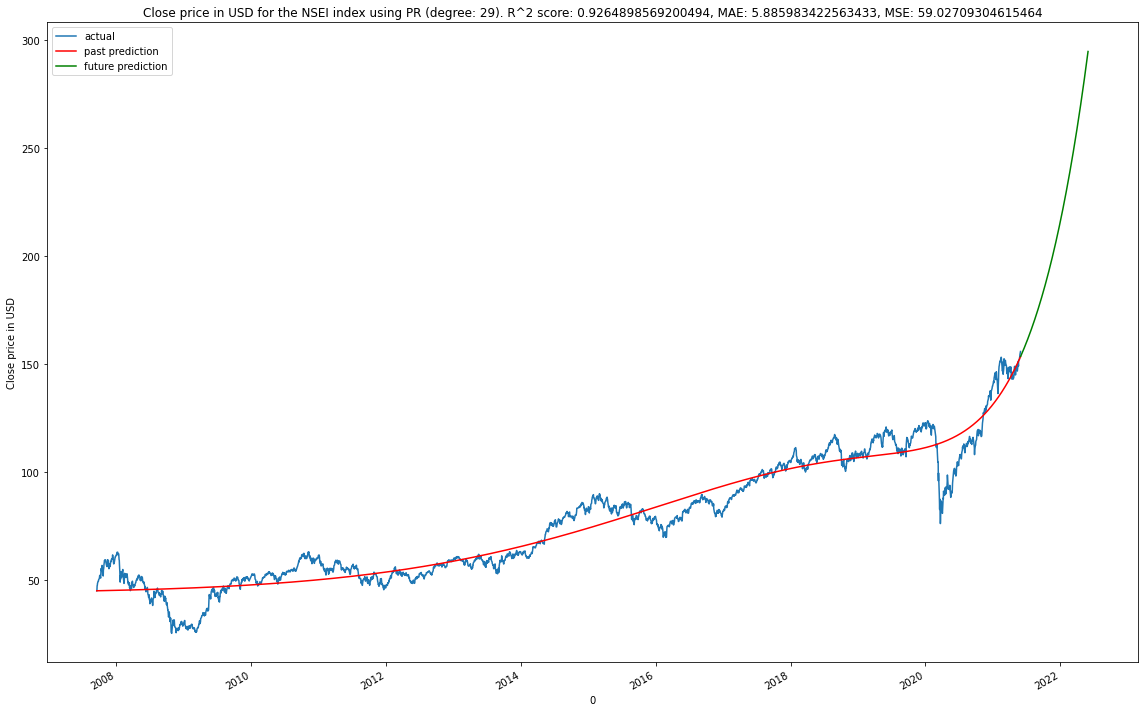

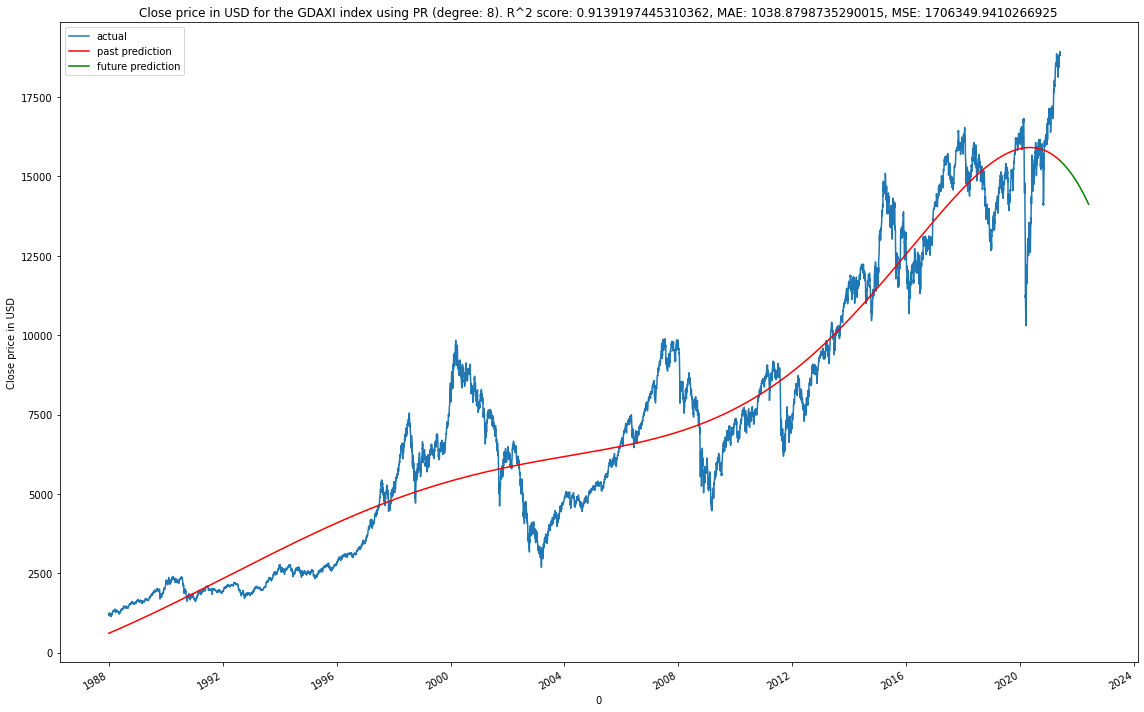

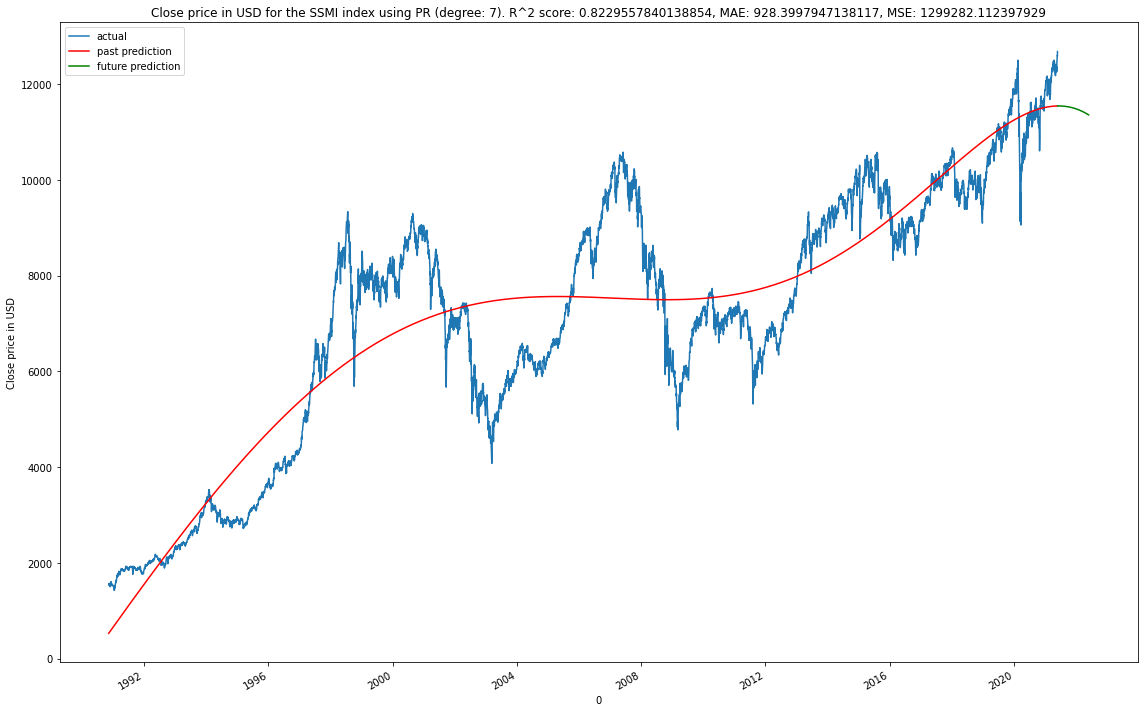

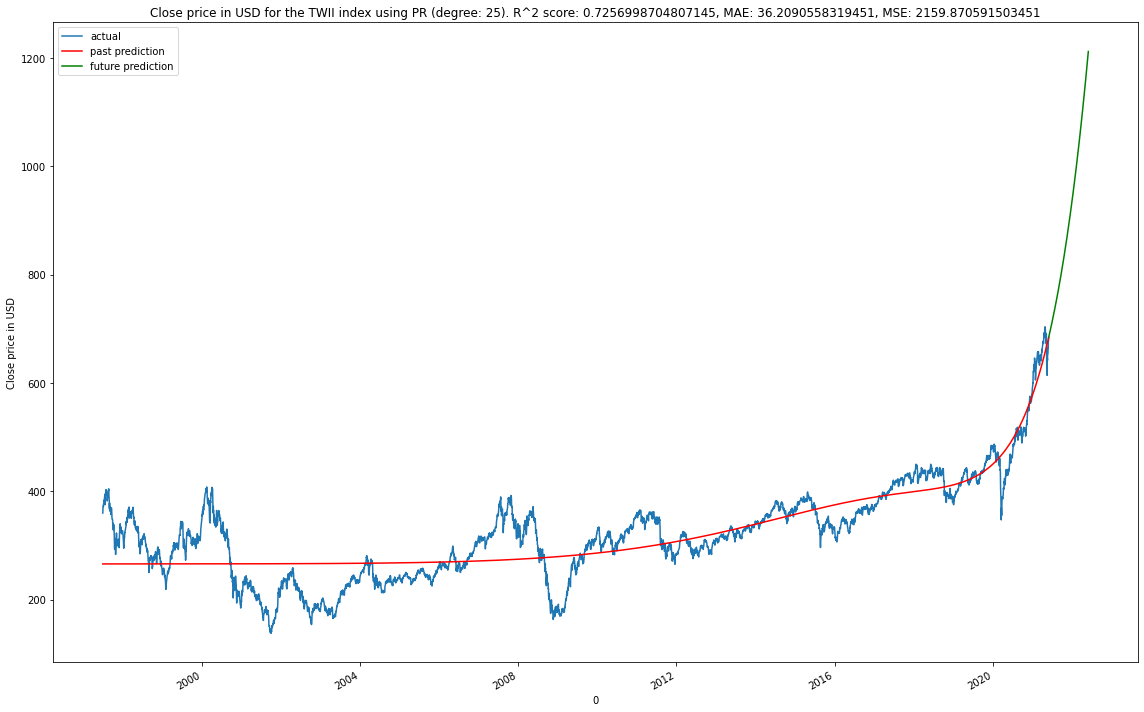

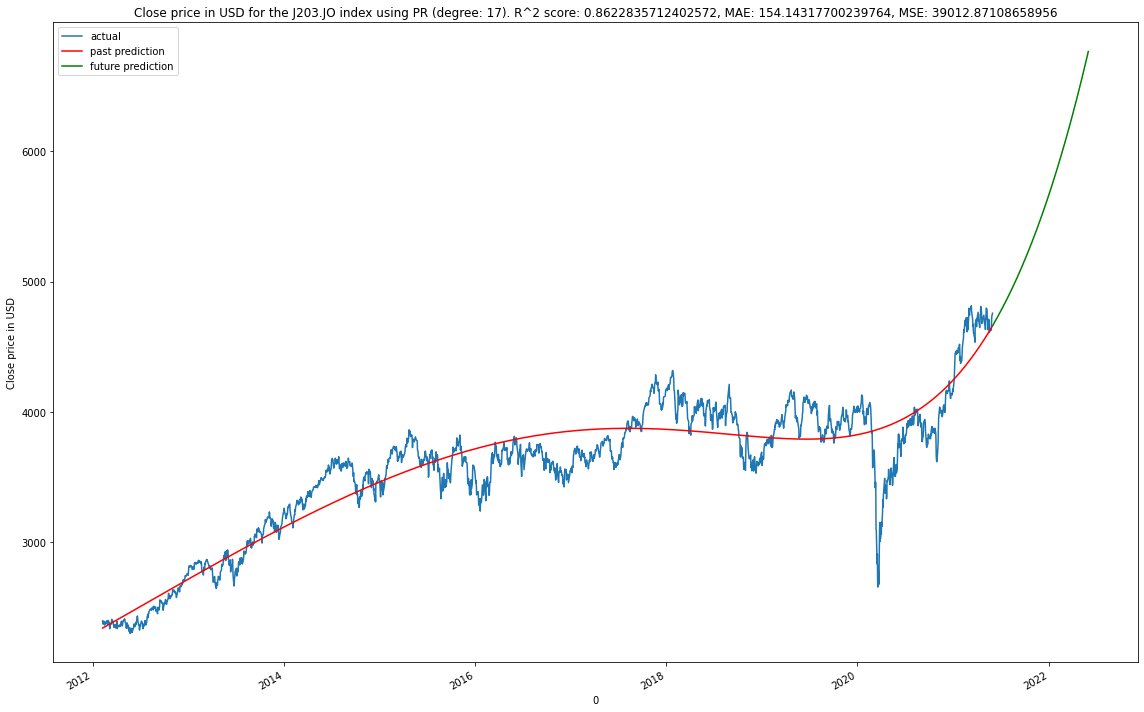

In [51]:
indexes = df["Index"].unique()
# indexes = ["IXIC"]
for index in indexes:
    pr_models(index)
    
for data in table_data:
    print(data)